---
format:
    html:
        embed-resources: true
---

# Visual EDA 

Write either a function, or a class, that performs exploratory data analysis (EDA) on a given CSV file.

Run the function on both of our cleaned CSV files that we created from our job description crawl. 

- Explore feature distributions and relationships
- Uncover trends, patterns, and correlations
- Consider incorporating a geo-spatial analysis where appropriate
  - Folium is a great tool for this: https://realpython.com/python-folium-web-maps-from-data/ 
- Visualize data effectively
- Make sure our results are highly visual with high quality plots.

By focusing on these steps, we'll extract valuable insights and inform deeper analysis of our job descriptions dataset.


### **Univariate Analysis (Single Feature)**
- **Frequency Counts**: For categorical features (e.g., job title, sector, job type), visualize frequency distribution (bar charts).
- **Salary Distribution**: Analyze the range and spread of salary data (histograms, box plots).
- **Job Posting Dates**: Plot distribution of job posting dates to find trends over time (time series plots).
- **Experience Level Distribution**: Explore the spread of entry-level, mid-level, and senior-level roles.
- **Location Distribution**: Map the distribution of jobs across different cities, states, or countries.
- **Job Type Analysis**: Count of job types (full-time, part-time, contract) and their proportions.
- **Job Description Length**: Analyze job description lengths by word or character count.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("df_cleaned.csv")

### Frequency counts

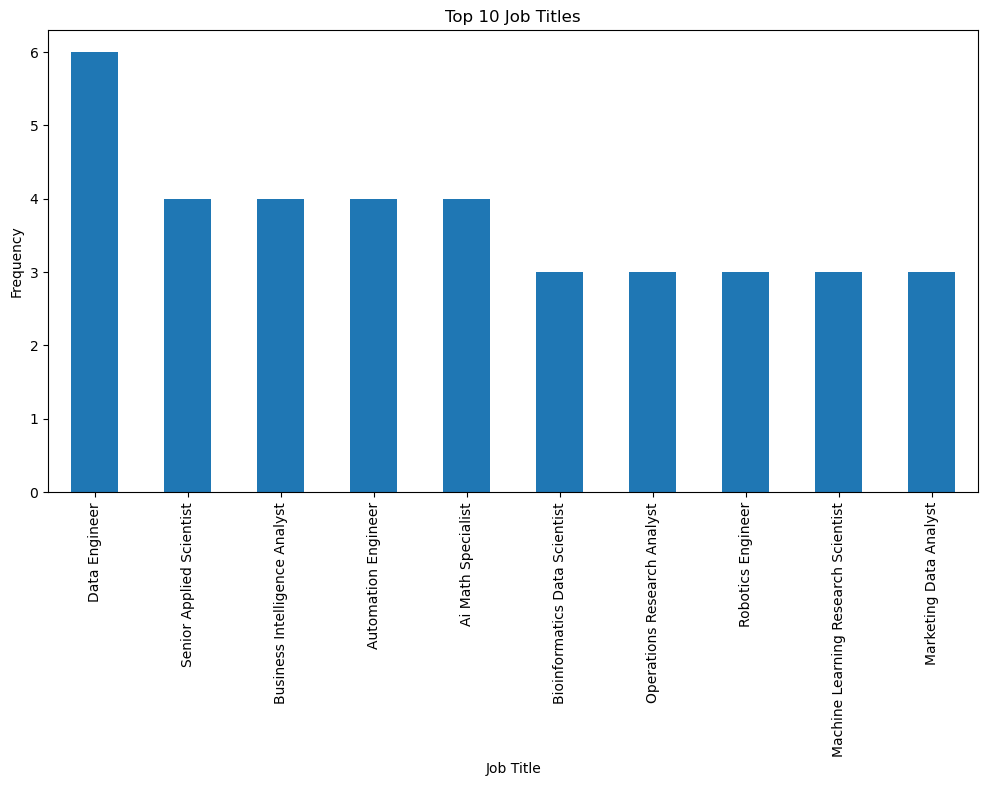

In [90]:
# Job Title Frequency
plt.figure(figsize=(12, 6))
df['title'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.show()

"Data Engineer" having the highest frequency. Other titles, such as "Senior Applied Scientist," "Business Intelligence Analyst," "Automation Engineer," and "AI Math Specialist," each appear same times.

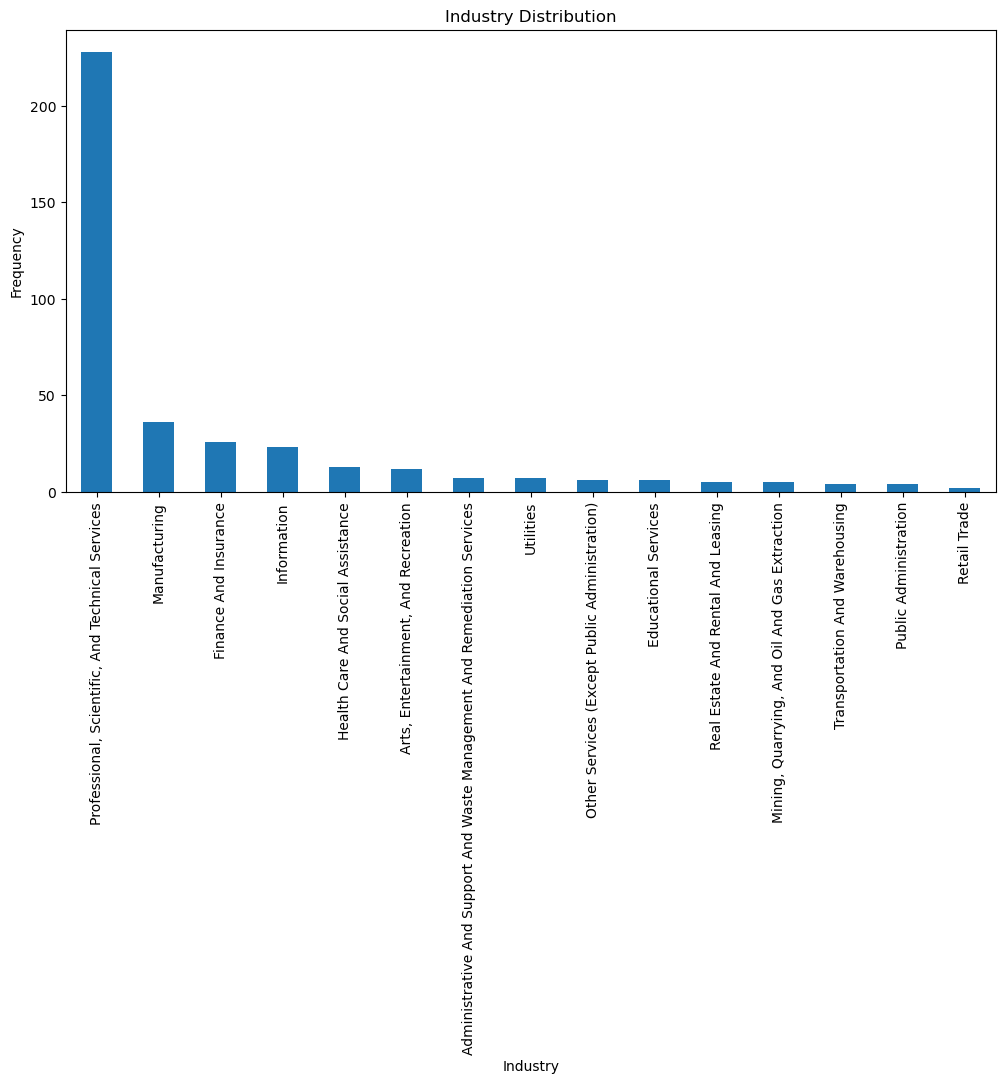

In [91]:
# Sector/Industry Frequency
plt.figure(figsize=(12, 6))
df['Industry'].value_counts().plot(kind='bar')
plt.title("Industry Distribution")
plt.xlabel("Industry")
plt.ylabel("Frequency")
plt.show()

This chart shows the distribution of job frequencies across different industries. The "Professional, Scientific, and Technical Services" industry has the highest frequency, with over 200 occurrences, indicating a strong demand in this sector. Other industries like "Manufacturing," "Finance and Insurance," and "Information" have noticeably lower frequencies, while the rest have minimal representation.

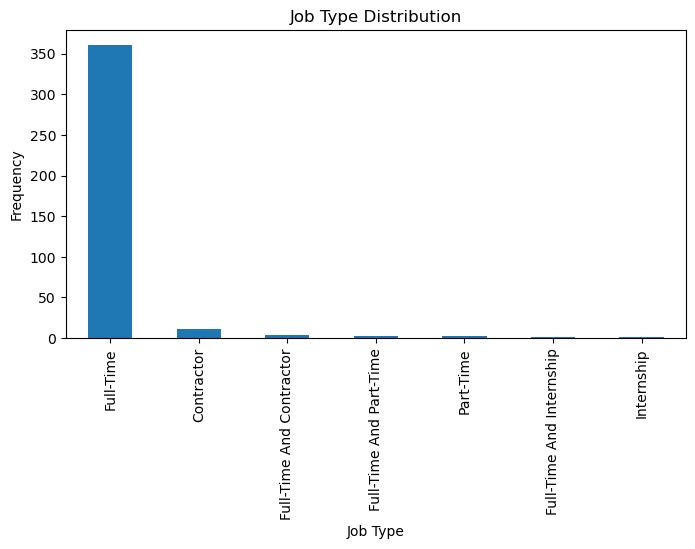

In [92]:

# Job Type Frequency
plt.figure(figsize=(8, 4))
df['job_type'].value_counts().plot(kind='bar')
plt.title("Job Type Distribution")
plt.xlabel("Job Type")
plt.ylabel("Frequency")
plt.show()

This chart illustrates the distribution of job types. "Full-Time" positions dominate, with over 350 occurrences, indicating that most job openings are for full-time roles. Other job types like "Contractor," "Full-Time and Contractor," and "Part-Time" appear much less frequently, showing limited demand for these roles.

### Salary Distributions

d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


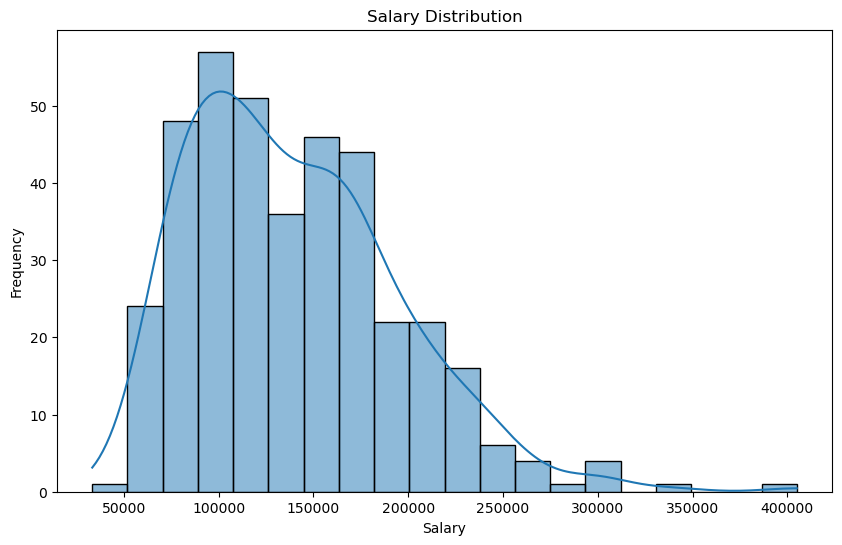

In [95]:
# Histogram of Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'].dropna(), bins=20, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

This histogram displays the distribution of salaries. Most salaries cluster around $100,000, with a gradual decline as salaries increase. A few high-salary positions above $200,000 create a long tail on the right, indicating a right-skewed distribution with fewer high-paying jobs.

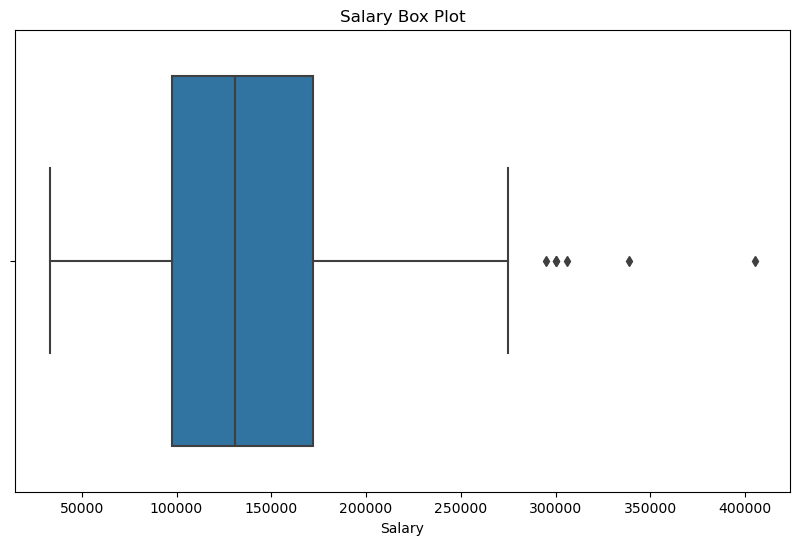

In [94]:
# Boxplot of Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary'].dropna())
plt.title("Salary Box Plot")
plt.xlabel("Salary")
plt.show()

This box plot displays the distribution of salaries. The interquartile range (IQR) is between approximately $100,000 and $150,000, indicating where the middle 50% of salaries lie. The median salary is around $125,000. A few outliers extend beyond $250,000, showing some high-paying positions, but most salaries are concentrated within the IQR.

### Job Posting Dates

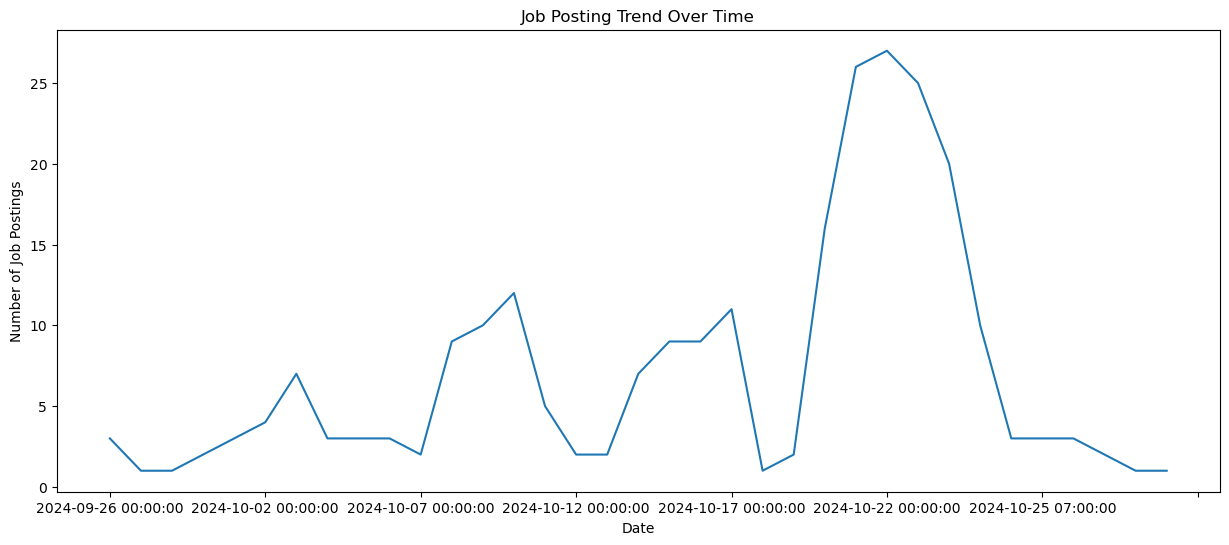

In [98]:
# Plot Job Posting Dates
plt.figure(figsize=(15, 6))
df['posted_date'].value_counts().sort_index().plot()
plt.title("Job Posting Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.show()

This line chart shows the trend of job postings over time. The number of postings fluctuates initially, with a noticeable increase starting around mid-October, peaking at over 25 postings. After the peak, there’s a sharp decline toward the end of October. This pattern suggests a possible surge in job postings during mid-October, followed by a rapid decrease.

### Experience Level Distribution

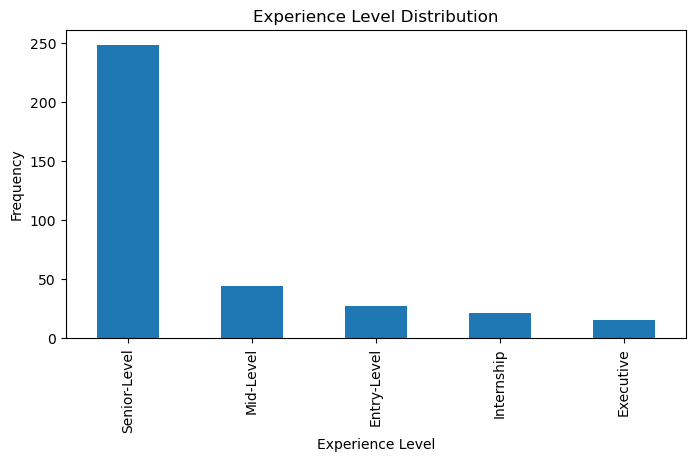

In [99]:
# Experience Level Distribution
plt.figure(figsize=(8, 4))
df['experience_level'].value_counts().plot(kind='bar')
plt.title("Experience Level Distribution")
plt.xlabel("Experience Level")
plt.ylabel("Frequency")
plt.show()

This bar chart shows the distribution of experience levels for job postings. "Senior-Level" positions dominate with the highest frequency, indicating a strong demand for experienced professionals. Other levels, such as "Mid-Level," "Entry-Level," "Internship," and "Executive," have significantly fewer postings.

### Location Distribution

In [234]:
import pandas as pd

df[['City', 'State', 'Country']] = df['Location'].str.split(', ', expand=True)

In [210]:
from geopy.geocoders import Nominatim
import time

# Initialize
geolocator = Nominatim(user_agent="job_location_mapper")

df['Latitude'] = None
df['Longitude'] = None

# Get Latitude and Longitude
for index, row in df.iterrows():
    location = f"{row['City']}, {row['State']}, {row['Country']}"
    try:
        geo_location = geolocator.geocode(location)
        if geo_location:
            df.at[index, 'Latitude'] = geo_location.latitude
            df.at[index, 'Longitude'] = geo_location.longitude
        time.sleep(5)  
    except Exception as e:
        print(f"Error in geocoding location {location}: {e}")
        break  # Exit if an unexpected error occurs
    time.sleep(1)  # Respect server rate limi

Error in geocoding location Dublin, Ca (+1 Other), United States: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Dublin%2C+Ca+%28%2B1+Other%29%2C+United+States&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


In [102]:
import folium
from folium.plugins import HeatMap

map_location = folium.Map(location=[37.7749, -95.7129], zoom_start=4) 

heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.dropna(subset=['Latitude', 'Longitude']).iterrows()]

HeatMap(heat_data).add_to(map_location)

map_location

This heat map displays the distribution of job postings across the United States. Areas with high concentrations of postings, shown in red, include regions around New York, Chicago, and parts of California. Other areas, such as Texas and the Pacific Northwest, show moderate concentrations, while blue areas indicate lower posting densities. This distribution suggests that job opportunities are more concentrated in specific urban regions.

### Job Type Analysis

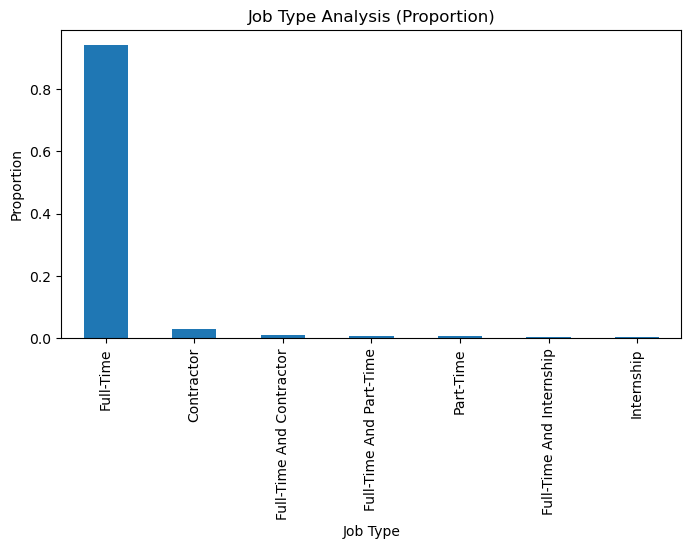

In [103]:
plt.figure(figsize=(8, 4))
df['job_type'].value_counts(normalize=True).plot(kind='bar')
plt.title("Job Type Analysis (Proportion)")
plt.xlabel("Job Type")
plt.ylabel("Proportion")
plt.show()

This bar chart illustrates the proportion of different job types. "Full-Time" roles dominate, making up nearly 90% of all job types, indicating a strong preference for full-time positions. Other types, such as "Contractor," "Part-Time," and internships, make up only a small fraction of the total, highlighting limited opportunities outside of full-time roles.

### Job Description Length

d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


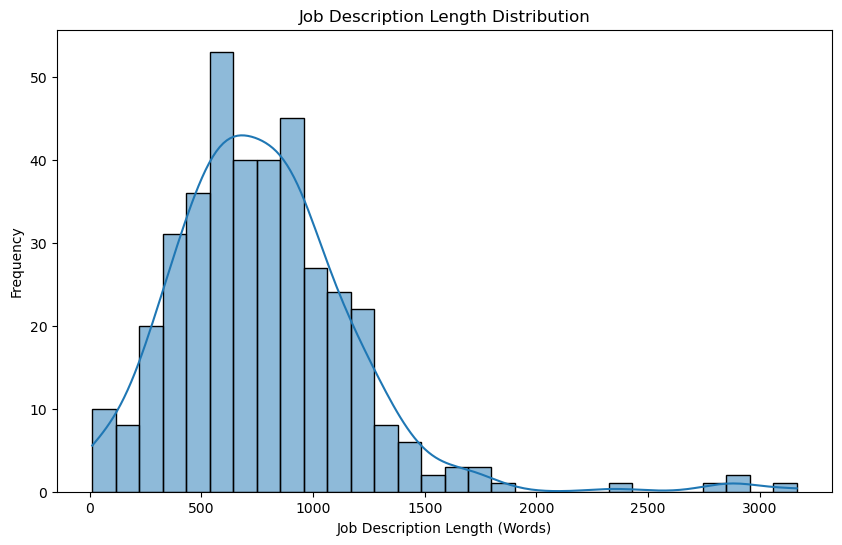

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Description_word_length'], bins=30, kde=True)
plt.title("Job Description Length Distribution")
plt.xlabel("Job Description Length (Words)")
plt.ylabel("Frequency")
plt.show()

This histogram shows the distribution of job description lengths in terms of word count. Most descriptions range between 500 and 1000 words, with a peak around 600-700 words, indicating that this length is typical. The distribution has a right skew, with a few longer descriptions extending beyond 2000 words, but these are relatively uncommon.

### **Multivariate Analysis (Multiple Features)**
- **Experience Level vs. Salary vs. Location**: Analyze how salary and experience vary across locations (3D scatter plot or heatmap).
- **Job Type vs. Experience Level vs. Sector**: Explore trends across job types, experience levels, and sectors (grouped bar plots).
- **Skills vs. Salary vs. Experience**: Check if certain skills demand higher salaries at different experience levels.
- **Salary vs. Sector vs. Company Size**: Compare salary ranges across sectors and company sizes.

### Experience Level vs. Salary vs. Location

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

df = df.dropna(subset=['Location', 'experience_level', 'salary'])

le = LabelEncoder()
df['Location_encoded'] = le.fit_transform(df['Location'])

fig = px.scatter_3d(df, x='Location_encoded', y='experience_level', z='salary',
                    color='Location', size='salary', hover_name='title',
                    title="Experience Level vs. Salary vs. Location")
fig.update_layout(scene=dict(
    xaxis=dict(title="Location"),
    yaxis=dict(title="Experience Level"),
    zaxis=dict(title="Salary")
))
fig.show()

D:\temp\ipykernel_20068\4103976199.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This 3D scatter plot visualizes the relationship between experience level, salary, and job location. The x-axis represents different experience levels (e.g., Internship, Entry-Level, Mid-Level, Senior-Level, Executive), the y-axis shows various job locations, and the z-axis represents salary ranges. Each dot color corresponds to a specific location, as shown in the legend on the right.

The plot reveals patterns, such as higher salaries generally being associated with more senior positions. Locations like New York and San Francisco, often represented by distinct colors, may have more high-paying jobs, especially at higher experience levels. This chart allows for a comparison of salary distributions across experience levels and locations.

### Job Type vs. Experience Level vs. Sector

<Figure size 2500x2000 with 0 Axes>

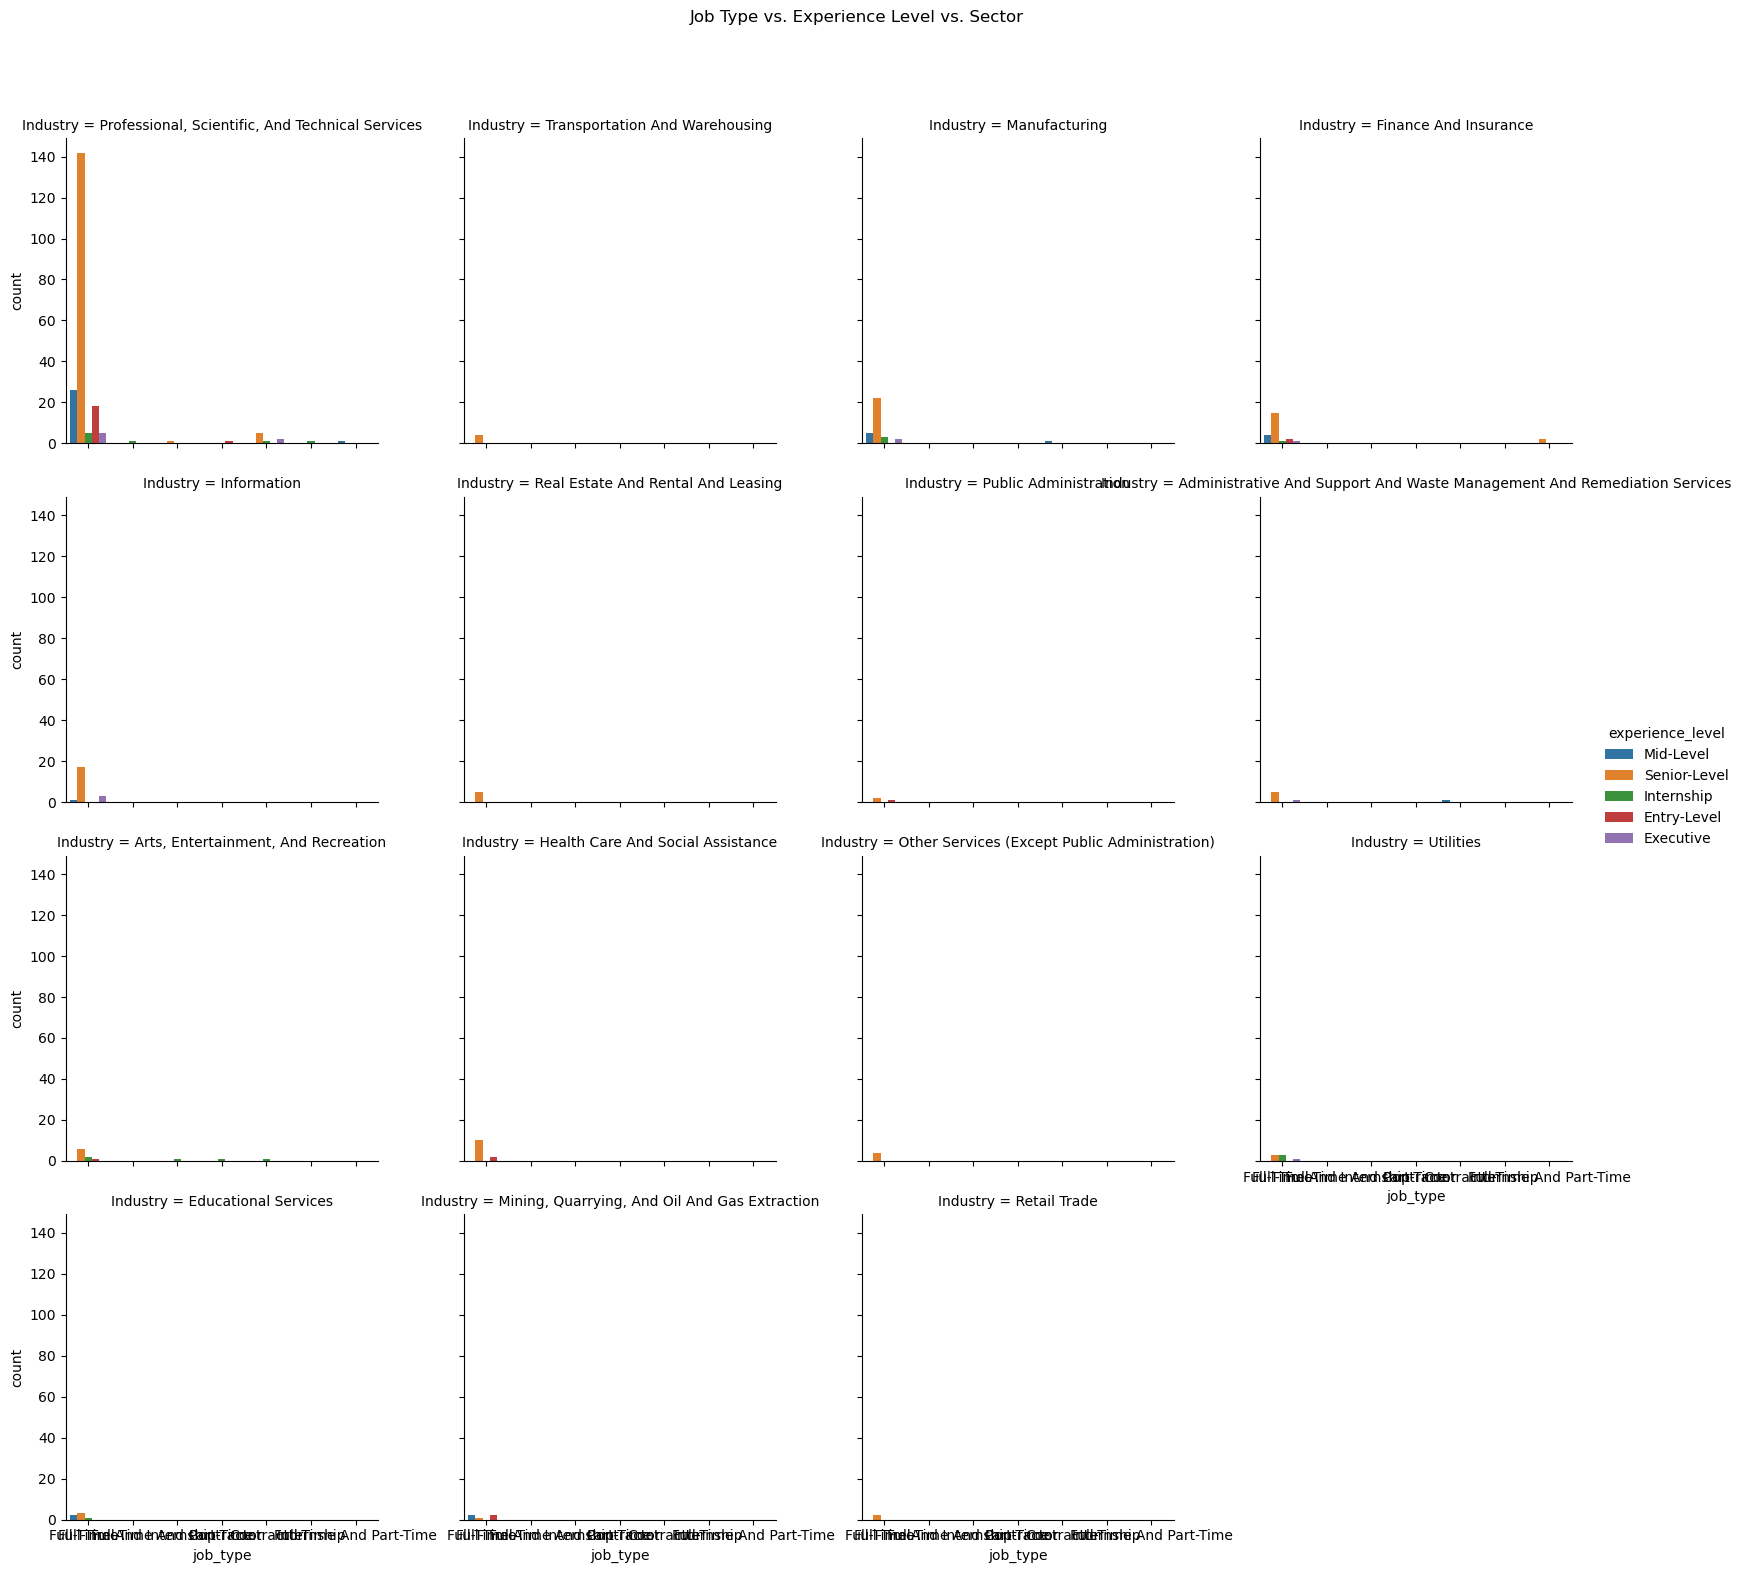

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 20))
sns.catplot(
    data=df, x='job_type', hue='experience_level', col='Industry', kind='count', 
    col_wrap=4,
    height=4, aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Job Type vs. Experience Level vs. Sector")
plt.show()

This series of bar charts shows the distribution of job types across different industries, categorized by experience levels. Each subplot represents an industry, with job type (e.g., Full-Time, Part-Time) on the x-axis and the count of jobs on the y-axis. The bars are color-coded by experience level, including Mid-Level, Senior-Level, Internship, Entry-Level, and Executive.

The Professional, Scientific, and Technical Services industry has the highest number of postings, particularly for Senior-Level full-time positions. In contrast, most other industries, like Transportation and Warehousing, Manufacturing, and Finance and Insurance, show much lower counts and limited diversity in job types and experience levels. This layout highlights the concentration of senior full-time roles in certain sectors while showing minimal demand in others.

### Skills vs. Salary vs. Experience

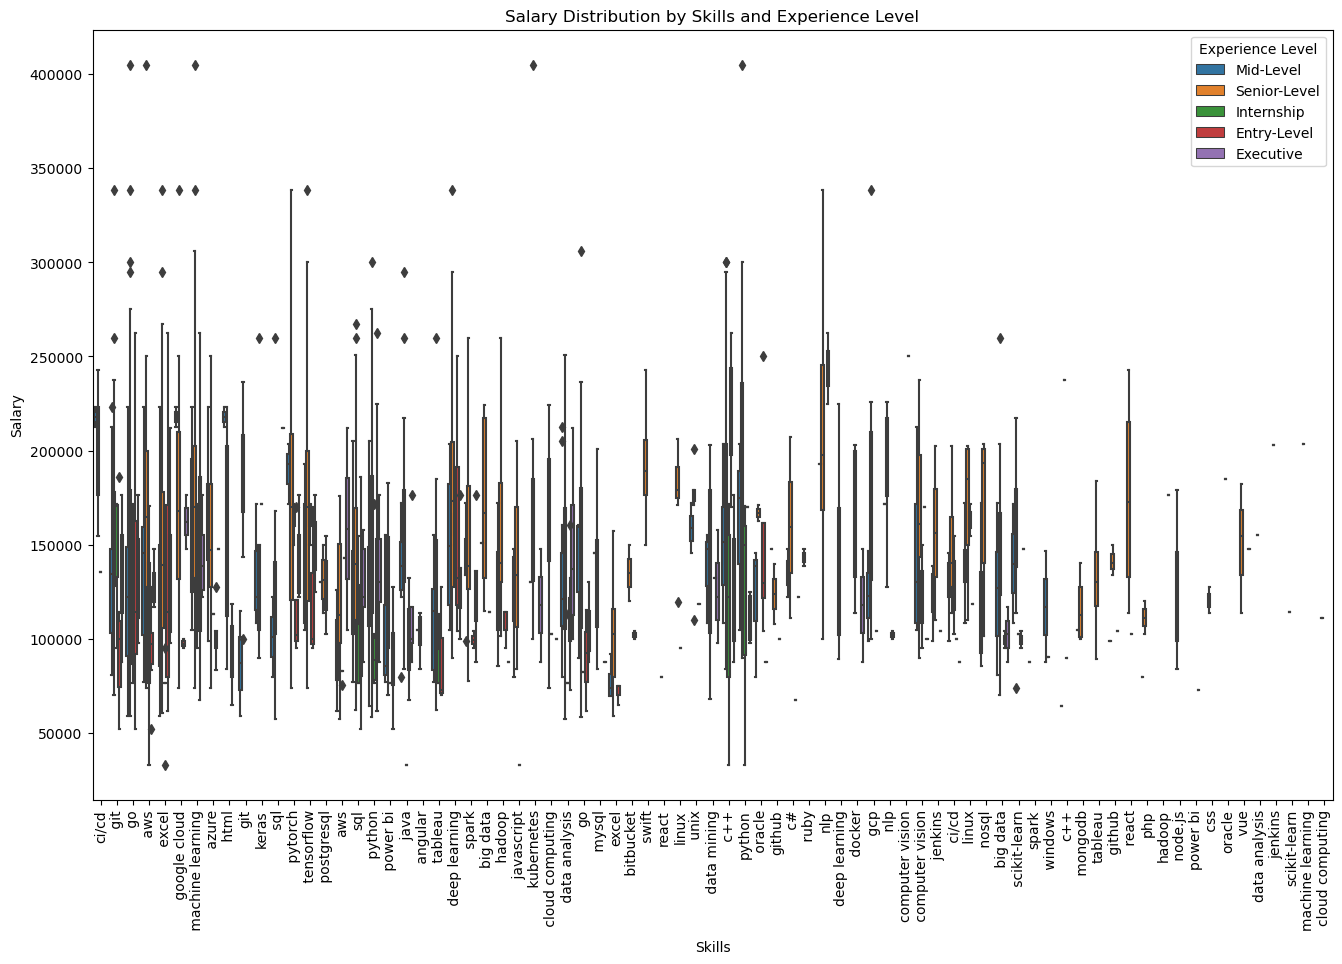

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter
df_filtered = df[df['salary'] > 0]

df_skills = df_filtered.assign(skills=df_filtered['skills_required'].str.split(',')).explode('skills')

plt.figure(figsize=(16, 10))
sns.boxplot(
    data=df_skills, x='skills', y='salary', hue='experience_level'
)
plt.xticks(rotation=90)
plt.title("Salary Distribution by Skills and Experience Level")
plt.xlabel("Skills")
plt.ylabel("Salary")
plt.legend(title='Experience Level')
plt.show()

This box plot shows the salary distribution across various skills, with salaries further broken down by experience level (e.g., Mid-Level, Senior-Level, Internship, Entry-Level, Executive) indicated by different colors. Each skill on the x-axis has a range of salaries on the y-axis, showing the spread and median salary for each skill set.

Skills like machine learning and AWS have higher salary ranges, especially at Senior and Executive levels.

### Salary vs. Sector vs. Company Size

In [171]:
df_filtered_cleaned = df.dropna(subset=['Industry', 'Company_Size'])

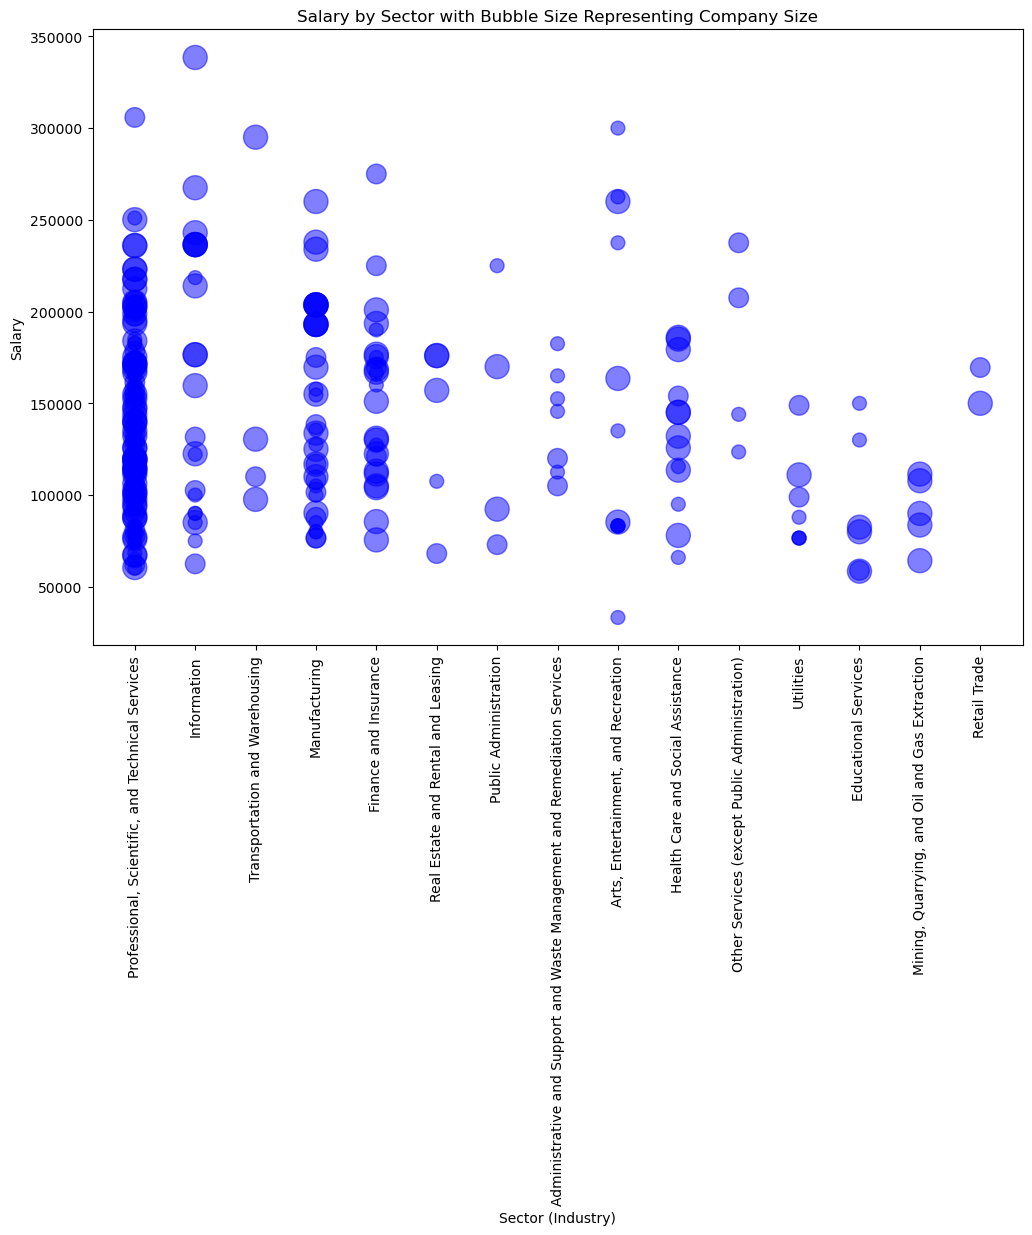

In [ ]:
company_size_mapping = {'Small': 100, 'Medium': 200, 'Large': 300}
df_filtered_cleaned['Bubble_Size'] = df_filtered_cleaned['Company_Size'].map(company_size_mapping)

plt.figure(figsize=(12, 8))
plt.scatter(x=df_filtered_cleaned['Industry'], y=df_filtered_cleaned['salary'], 
            s=df_filtered_cleaned['Bubble_Size'], alpha=0.5, c='blue')
plt.xticks(rotation=90)
plt.title("Salary by Sector with Bubble Size Representing Company Size")
plt.xlabel("Sector (Industry)")
plt.ylabel("Salary")
plt.show()


The Professional, Scientific, and Technical Services sector has a wide salary range, with many high-paying roles.
Larger bubbles, indicating larger companies, are spread across multiple sectors but are more concentrated in industries like Finance and Insurance and Information.
Salaries vary significantly within each sector, highlighting industry diversity in pay levels.

### **Text Analysis and Feature Engineering**
- **Keyword Frequency**: Extract and analyze the most common keywords from job descriptions and required skills.
- **Text Length Analysis**: Look at the distribution of text lengths in job descriptions to identify patterns in verbosity.
- **NLP for Job Titles**: Group similar job titles by extracting key terms using Natural Language Processing (e.g., clustering similar roles).
- **Sentiment Analysis**: Perform sentiment analysis on company values or job descriptions to gauge company culture.
- **Named Entity Recognition (NER)**: Extract entities like company names, technologies, and locations from the text data.
- **Topic Modeling**: Identify topics or themes within job descriptions using topic modeling techniques like LDA (Latent Dirichlet Allocation).

### Keyword Frequency

In [3]:
import re
import numpy as np

# Step 1: Define a function to clean the keywords column
def clean_keywords(text):
    # Remove double quotes, square brackets, and strip whitespace
    text = re.sub(r'["\[\]]', '', str(text))  # Remove " and []
    text = text.strip()  # Remove any leading or trailing whitespace
    # Return NaN if the text is empty after cleaning
    return text if text else np.nan

# Step 2: Apply the cleaning function to the 'keywords' column
df['keywords'] = df['keywords'].apply(clean_keywords)

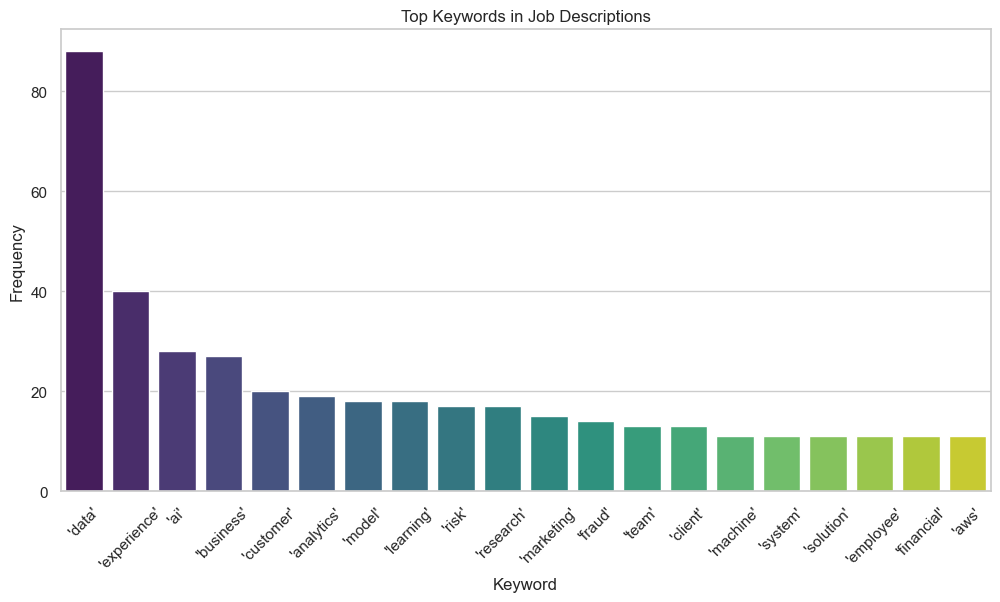

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Example setup for 'keywords' column, assuming keywords are comma-separated
# df['keywords'] = ["Python, SQL, Machine Learning", "Data Analysis, SQL", ...]

# Step 1: Split keywords and flatten into a single list
all_keywords = df['keywords'].dropna().str.split(',').sum()
all_keywords = [keyword.strip().lower() for keyword in all_keywords]  # Clean whitespace and lowercase

# Step 2: Count keyword occurrences
keyword_counts = Counter(all_keywords)

# Step 3: Convert to DataFrame and sort by frequency
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Step 4: Plot the top keywords
plt.figure(figsize=(12, 6))
sns.barplot(data=keyword_df.head(20), x='Keyword', y='Frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title("Top Keywords in Job Descriptions")
plt.show()

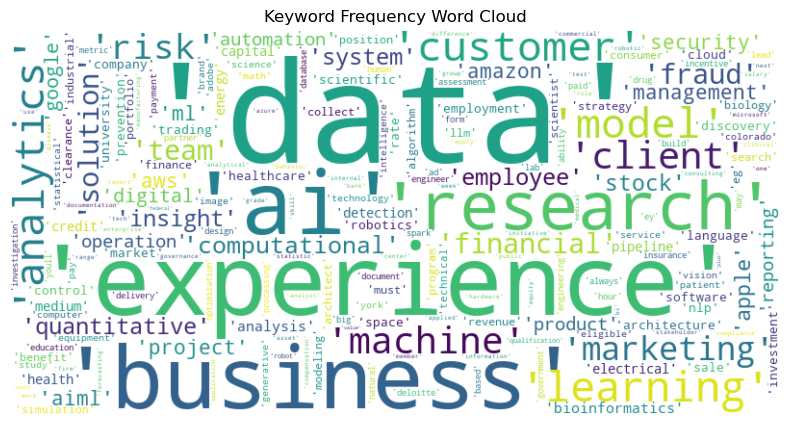

In [5]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(keyword_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Frequency Word Cloud")
plt.show()

This bar chart displays the top keywords found in job descriptions, with their frequency of occurrence. The keyword "data" appears most frequently, followed by "experience" and "AI", indicating a strong emphasis on data-related skills and artificial intelligence in job descriptions. Other common terms include "business," "customer," and "analytics," reflecting the importance of analytical and business skills in these roles. This chart highlights the key competencies employers are looking for in job candidates.

### Text Length Analysis

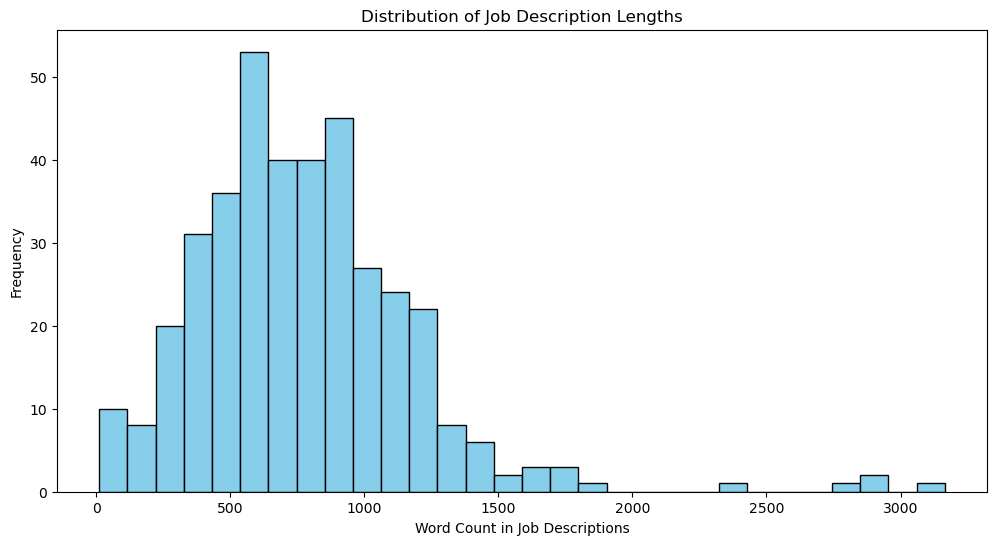

Mean description length: 775.9791666666666
Median description length: 733.5
Maximum description length: 3165
Minimum description length: 12


In [182]:
import matplotlib.pyplot as plt

# Plot the distribution of description lengths
plt.figure(figsize=(12, 6))
plt.hist(df['Description_word_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Job Description Lengths')
plt.xlabel('Word Count in Job Descriptions')
plt.ylabel('Frequency')
plt.show()

# display some statistics
print("Mean description length:", df['Description_word_length'].mean())
print("Median description length:", df['Description_word_length'].median())
print("Maximum description length:", df['Description_word_length'].max())
print("Minimum description length:", df['Description_word_length'].min())

This histogram shows the distribution of word counts in job descriptions. Most job descriptions range between 500 and 1000 words, with the highest frequency around 500-600 words. The distribution is right-skewed, with a few descriptions exceeding 2000 words but these are rare. This indicates that the majority of job descriptions are relatively concise, with only a small number being exceptionally lengthy.

### NLP for Job Titles

In [188]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean and preprocess job titles
df['title_cleaned'] = df['title'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Step 2: Vectorize job titles using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
title_vectors = tfidf_vectorizer.fit_transform(df['title_cleaned'])

# Step 3: Reduce dimensionality for easier visualization
pca = PCA(n_components=2)
title_vectors_2d = pca.fit_transform(title_vectors.toarray())

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



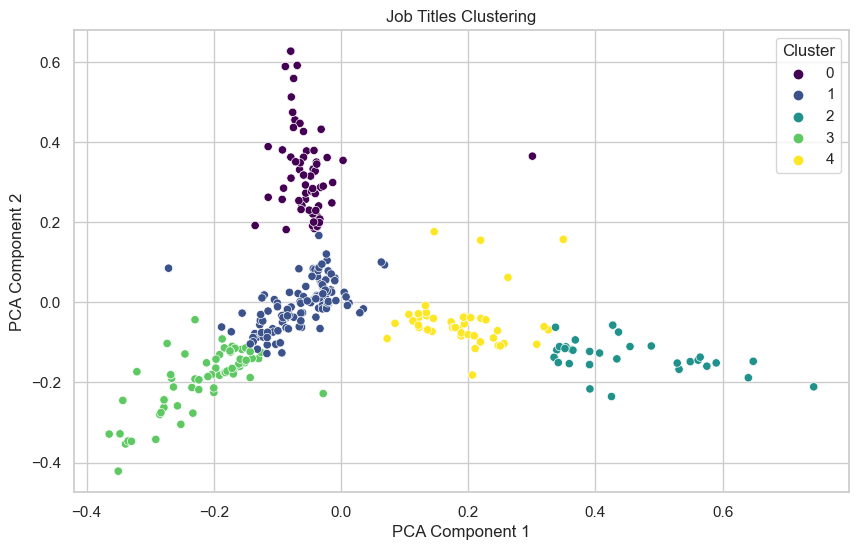


Cluster 0 Sample Titles:
['Applied Scientist', 'Applied Scientist Ii, Console Science', 'Applied Scientist Ii, Amazon Bedrock', 'Applied Scientist, Aws Marketing Ai/Ml', 'Applied Ml Scientist, Shortcuts']

Cluster 1 Sample Titles:
['Ai Solution Architect - Azure', 'Ai Solution Architect', 'Solution Architect Data & Ai - Ctj - Secret', 'Ai Solutions Architect', 'Solutions Architect, Data And Ai, Google Cloud']

Cluster 2 Sample Titles:
['Automation Engineer', 'Automation Engineer', 'Automation Engineer', 'Automation Engineer', 'Data Engineer']


In [277]:
# Step 4: Apply KMeans clustering
# Decide on the number of clusters (e.g., 5 clusters here)
kmeans = KMeans(n_clusters=5, random_state=42)
df['title_cluster'] = kmeans.fit_predict(title_vectors_2d)

# Step 5: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=title_vectors_2d[:, 0], y=title_vectors_2d[:, 1], hue=df['title_cluster'], palette="viridis")
plt.title("Job Titles Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 6: Display sample job titles from each cluster
for i in range(3):  # Adjust the range based on the number of clusters
    print(f"\nCluster {i} Sample Titles:")
    print(df[df['title_cluster'] == i]['title'].head(5).tolist())

Distinct clusters suggest that job titles can be grouped into categories with similar characteristics.
Clusters vary in their positioning, indicating differences in the underlying features of job titles across clusters.
The spread along the PCA components shows how job titles vary based on the reduced feature dimensions, helping visualize similarities and differences between clusters.

### Sentiment Analysis

In [348]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on company values and job descriptions
def analyze_sentiment(text):
    if pd.isna(text):
        return None
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Apply sentiment analysis to company values and job descriptions
df1 = df
df1['company_values_sentiment'] = df['Company_Values'].apply(analyze_sentiment)

# Display sentiment columns
df1.dropna(subset=['company_values_sentiment'], inplace=True)
df1['company_values_sentiment'].head()

0    0.3818
2    0.8689
3    0.0000
5    0.9081
7    0.6908
Name: company_values_sentiment, dtype: float64

d:\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



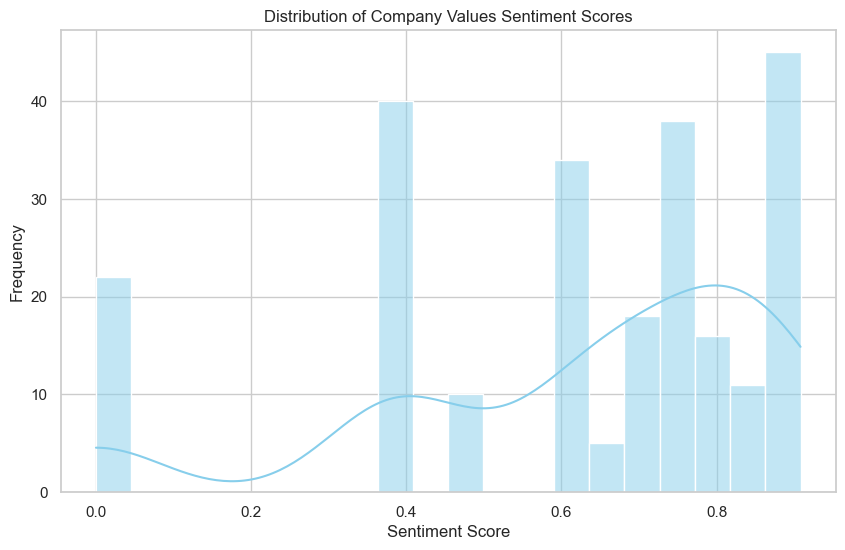

In [349]:
# Plot the distribution of company values sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df1['company_values_sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Company Values Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

    Higher sentiment scores (closer to 1) are on the right side, indicating positive perceptions.
    Lower scores (closer to 0) are on the left, showing neutral or negative sentiment.

The chart suggests that most company values have positive sentiment, with peaks around 0.4, 0.6, and 0.8. A small number of companies have values perceived negatively or neutrally (near 0.0). The overall distribution shows a tendency towards positive sentiment in company values.

### Named Entity Recognition (NER)

In [6]:
import spacy
from collections import defaultdict
import pandas as pd

# Load spaCy English model (use a larger model if possible)
nlp = spacy.load("en_core_web_sm")

# Define NER extraction function that returns entities as a dictionary
def extract_entities(text):
    """
    Perform NER on the given text using spaCy and return extracted entities as a dictionary.
    """
    if pd.isna(text) or text.strip() == "":
        return None
    doc = nlp(text)
    entities = defaultdict(list)
    for ent in doc.ents:
        entities[ent.label_].append(ent.text)
    return dict(entities) if entities else None

# Apply NER to each relevant column and store results in new columns
df['company_entities'] = df['company_name'].apply(extract_entities)
df['location_entities'] = df['Location'].apply(extract_entities)
df['skills_entities'] = df['skills_required'].apply(extract_entities)
df['title_entities'] = df['title'].apply(extract_entities)

# Display a sample of extracted entities for verification
print(df[['company_entities', 'location_entities','skills_entities', 'title_entities']].head(10))


                     company_entities  \
0                                None   
1               {'ORG': ['deloitte']}   
2              {'ORG': ['microsoft']}   
3                                None   
4                                None   
5              {'ORG': ['microsoft']}   
6                                None   
7  {'PERSON': ['kizan technologies']}   
8                                None   
9                                None   

                                   location_entities  \
0  {'GPE': ['Dallas', 'United States'], 'ORG': ['...   
1   {'GPE': ['Grand Rapids', 'Mi', 'United States']}   
2         {'GPE': ['Reston', 'Va', 'United States']}   
3         {'GPE': ['Denver', 'Co', 'United States']}   
4  {'PERSON': ['Austin'], 'ORG': ['Tx'], 'GPE': [...   
5                   {'GPE': ['Sc', 'United States']}   
6                         {'GPE': ['United States']}   
7  {'ORG': ['Lincoln', 'Ne'], 'GPE': ['United Sta...   
8     {'GPE': ['Des Moines', 'Ia', 'United S

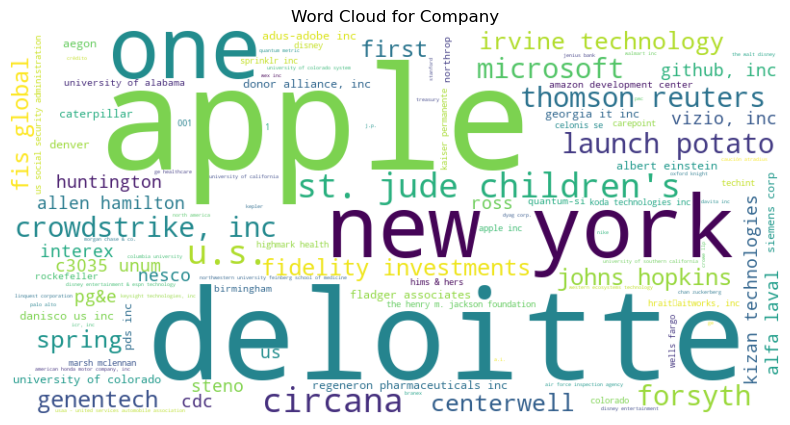

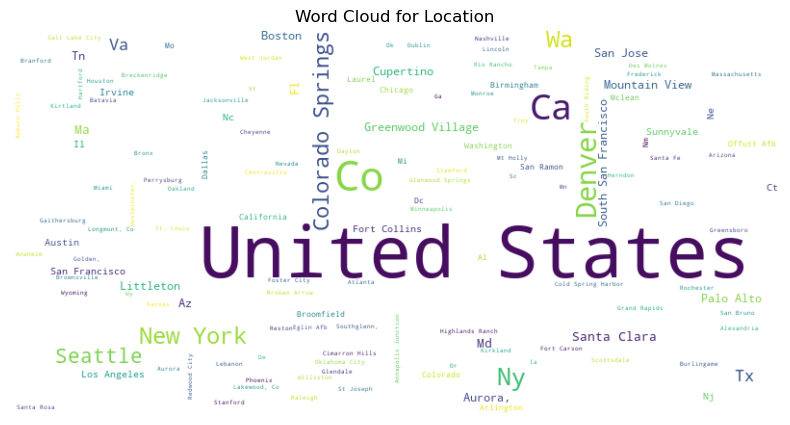

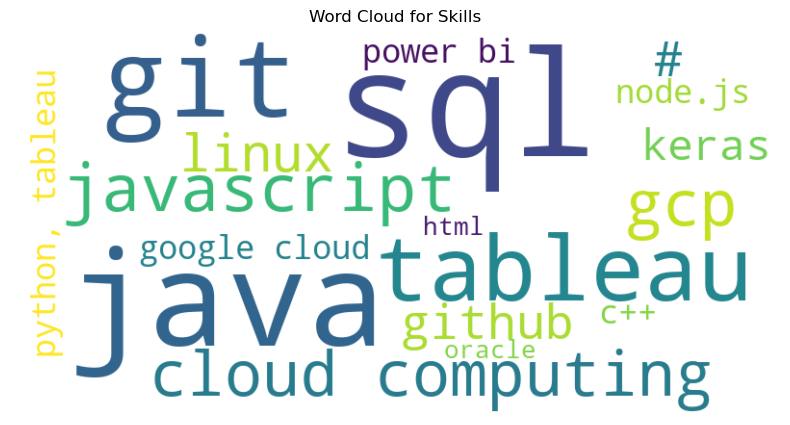

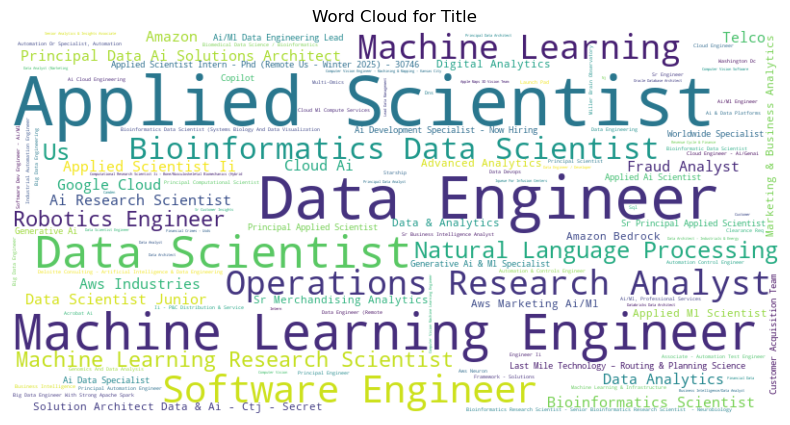

In [7]:
def aggregate_entities(df, column_name):
    all_entities = []
    for entities in df[column_name].dropna():
        for entity_list in entities.values():
            all_entities.extend(entity_list)
    return Counter(all_entities)

# Generate and plot word cloud for each entity type
entity_columns = ['company_entities', 'location_entities', 'skills_entities', 'title_entities']
for col in entity_columns:
    # Aggregate entities
    entity_counter = aggregate_entities(df, col)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(entity_counter)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {col.replace('_entities', '').title()}")
    plt.show()

This data snippet shows extracted entities related to companies, locations, skills, and titles from job descriptions. 

### Topic Modeling

Topic 1:
learning, machine, ai, models, data, science, engineering, research, team, solutions
Topic 2:
data, business, analytics, team, skills, solutions, role, insights, management, support
Topic 3:
team, status, employees, company, including, job, disability, employment, customers, business
Topic 4:
fraud, data, skills, models, prevention, math, based, expertise, detection, ability
Topic 5:
position, risk, information, data, research, required, management, analysis, education, application


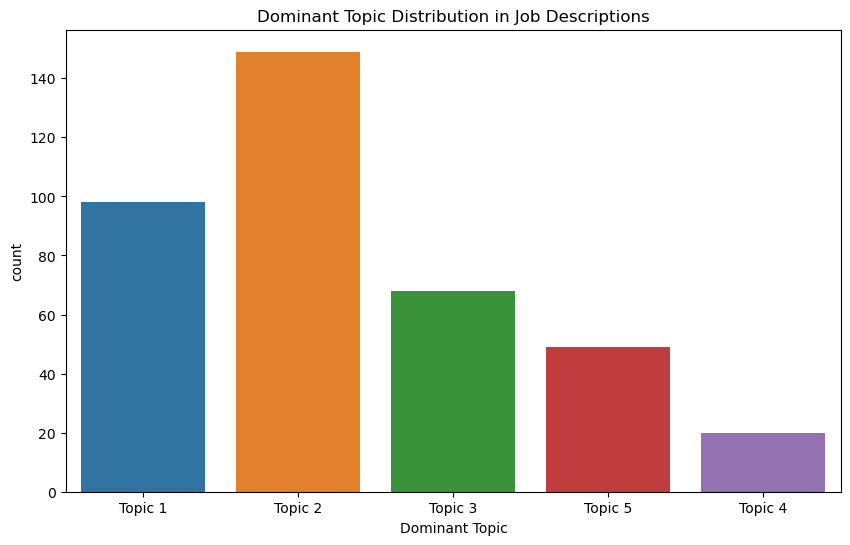

In [212]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing function
def preprocess_text(text):
    """
    Basic text preprocessing: lowercase text, remove punctuation and non-alphabetic characters,
    and trim extra whitespace.
    """
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # Remove non-alphabet characters
    text = text.lower().strip()  # Lowercase and trim whitespace
    return text

# Clean the 'Responsibilities' column and create a new column for processed descriptions
df['cleaned_description'] = df['description'].apply(preprocess_text)

# Convert the cleaned text data into a bag-of-words matrix
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=10)  # Ignore high- and low-frequency words
text_data = vectorizer.fit_transform(df['cleaned_description'])

# Initialize the LDA model to discover topics
num_topics = 5  # Define number of topics to extract
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(text_data)

# Function to display top words for each topic
def display_topics(model, feature_names, num_words):
    """
    Display top words for each topic generated by the LDA model.
    """
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

# Print the top 10 words for each topic
num_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, num_words)

# Visualize the dominant topic distribution across job descriptions
topic_distribution = lda.transform(text_data)
df_topics = pd.DataFrame(topic_distribution, columns=[f'Topic {i+1}' for i in range(num_topics)])
df_topics['Dominant Topic'] = df_topics.idxmax(axis=1)  # Assign the highest scoring topic as dominant

plt.figure(figsize=(10, 6))
sns.countplot(data=df_topics, x='Dominant Topic')
plt.title("Dominant Topic Distribution in Job Descriptions")
plt.show()

Topic 2 appears most frequently, with over 140 occurrences, indicating that it is a common theme in the analyzed job descriptions.
Topic 1 and Topic 3 also have notable frequencies, suggesting these topics are relevant but less dominant than Topic 2.
Topic 5 and Topic 4 are less frequent, with Topic 4 having the fewest mentions.

### **Date and Time Analysis**
- **Job Posting Frequency Over Time**: Check trends in job postings over time (monthly, weekly).
- **Application Deadline vs. Posting Date**: Analyze how much time is typically given for application submissions.
- **Job Posting Expiry Analysis**: Explore how long jobs remain posted before expiring.
- **Seasonality**: Identify seasonal hiring trends by analyzing the distribution of job postings by month or quarter.

### Job Posting Frequency Over Time

D:\temp\ipykernel_20068\2513878443.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



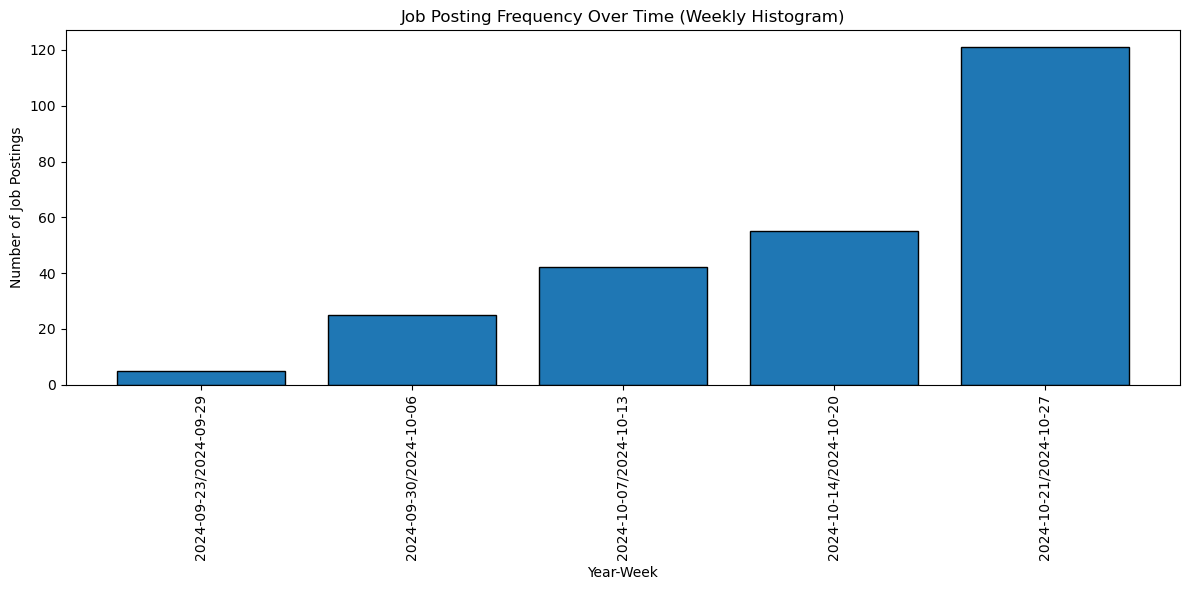

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date columns are in datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'].dropna(), errors='coerce')
df['Application Deadline'] = pd.to_datetime(df['Application Deadline'].dropna(), errors='coerce')
df['Job Posting Expiry Date'] = pd.to_datetime(df['Job Posting Expiry Date'].dropna(), errors='coerce')

# 1. **Job Posting Frequency Over Time (Weekly)**
# Resample by week to see the number of job postings over time
df1 = df.dropna(subset=['posted_date'])
df1['year_week'] = df1['posted_date'].dt.to_period('W')
job_posting_counts = df1['year_week'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(job_posting_counts.index.astype(str), job_posting_counts.values, width=0.8, edgecolor='black')
plt.xticks(rotation=90)
plt.title("Job Posting Frequency Over Time (Weekly Histogram)")
plt.xlabel("Year-Week")
plt.ylabel("Number of Job Postings")
plt.tight_layout()  # Ensure labels fit well
plt.show()

Job postings started at a low frequency in late September.
There is a gradual increase in postings through October, with a significant peak in the last week of October, reaching over 100 postings.

### Application Deadline vs. Posting Date

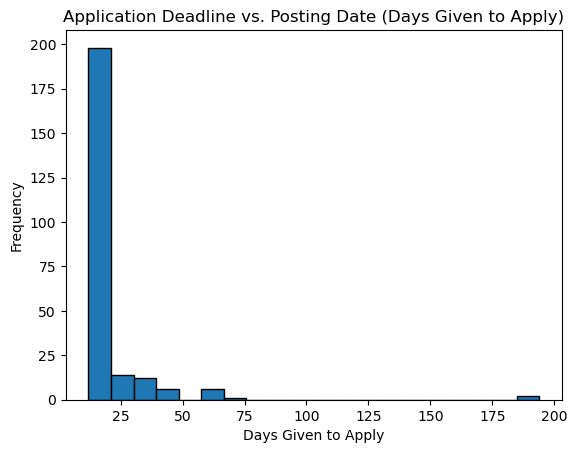

In [220]:
# 2. **Application Deadline vs. Posting Date**
# Calculate the time difference between posting date and application deadline
df['time_to_apply'] = (df['Application Deadline'] - df['posted_date']).dt.days

# Plot histogram for time to apply
df1 = df[df['time_to_apply'] >0]
df1 = df1[df1['time_to_apply'] <400]
plt.hist(df1['time_to_apply'].dropna(), bins=20, edgecolor='black')
plt.title("Application Deadline vs. Posting Date (Days Given to Apply)")
plt.xlabel("Days Given to Apply")
plt.ylabel("Frequency")
plt.show()

Most job postings give about 25 days or less to apply, as shown by the tall bar on the left.
A smaller number of postings allow between 25 and 75 days to apply.
Very few postings offer extended application periods of over 100 days.

### Job Posting Expiry Analysis

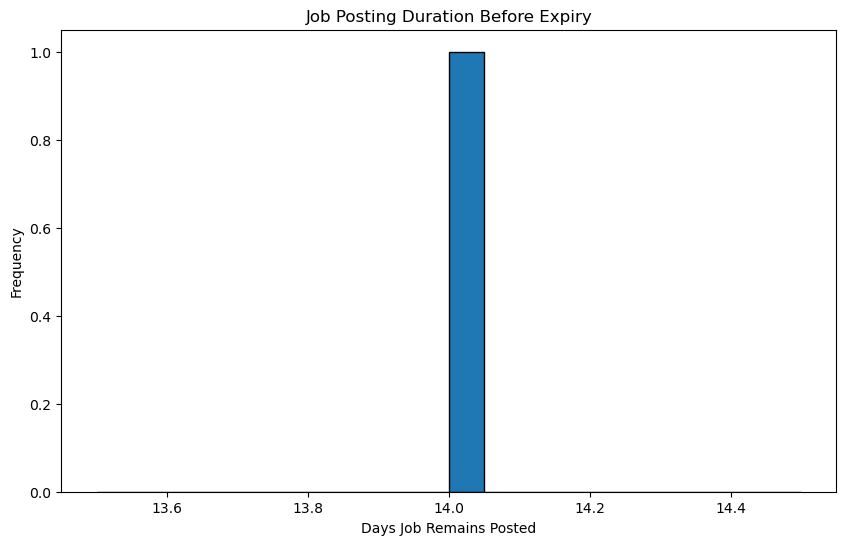

In [226]:
# Calculate the duration a job remains posted
df1 = df.dropna(subset=['Job Posting Expiry Date'])
df1 = df1.dropna(subset=['posted_date'])
df1['posting_duration'] = (df1['Job Posting Expiry Date'] - df1['posted_date']).dt.days

# Plot histogram for job posting duration
plt.figure(figsize=(10, 6))
df1 = df1[df1['posting_duration'] > 0]
plt.hist(df1['posting_duration'].dropna(), bins=20, edgecolor='black')
plt.title("Job Posting Duration Before Expiry")
plt.xlabel("Days Job Remains Posted")
plt.ylabel("Frequency")
plt.show()

All job postings have a duration of exactly 14 days before they expire, as indicated by the single bar at 14 on the x-axis.

### Seasonality

D:\temp\ipykernel_20068\661582142.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\temp\ipykernel_20068\661582142.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



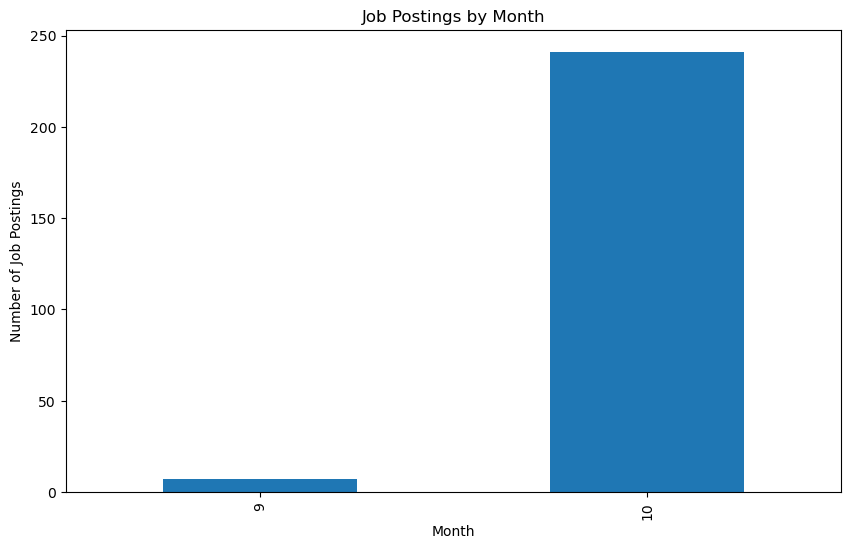

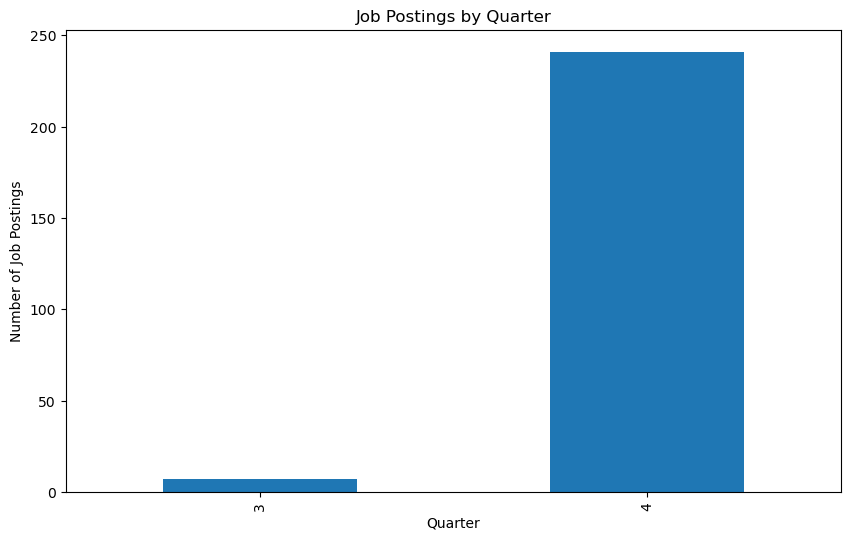

In [228]:
# Extract the month and quarter from the posted date
df1['posted_month'] = df1['posted_date'].dt.month
df1['posted_quarter'] = df1['posted_date'].dt.quarter

# Monthly seasonality
plt.figure(figsize=(10, 6))
df1['posted_month'].value_counts().sort_index().plot(kind='bar')
plt.title("Job Postings by Month")
plt.xlabel("Month")
plt.ylabel("Number of Job Postings")
plt.show()

# Quarterly seasonality
plt.figure(figsize=(10, 6))
df1['posted_quarter'].value_counts().sort_index().plot(kind='bar')
plt.title("Job Postings by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of Job Postings")
plt.show()

Quarter 4 has a significantly higher number of postings, with around 250, compared to Quarter 3, which has very few postings.

### **Geospatial Analysis**
- **Heatmap of Job Locations**: Visualize job density by location (city, state, country) on a map.
- **Salary by Geographic Region**: Compare average salaries across different geographic regions (e.g., East Coast vs. West Coast).
- **Remote Work Proportion by Location**: Analyze how remote job opportunities vary across regions.

### Heatmap of Job Locations

In [238]:
import folium
from folium.plugins import HeatMap

map_location = folium.Map(location=[37.7749, -95.7129], zoom_start=4) 

heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.dropna(subset=['Latitude', 'Longitude']).iterrows()]

HeatMap(heat_data).add_to(map_location)

map_location

High-density areas (indicated in red) are located in major cities such as New York and Los Angeles, suggesting a high concentration of job opportunities in these areas.
Moderate-density areas (shown in yellow and green) are visible in cities like Chicago, Washington, D.C., and Denver.
Lower-density areas (in blue) are scattered across various regions, indicating fewer job postings.

### Salary by Geographic Region

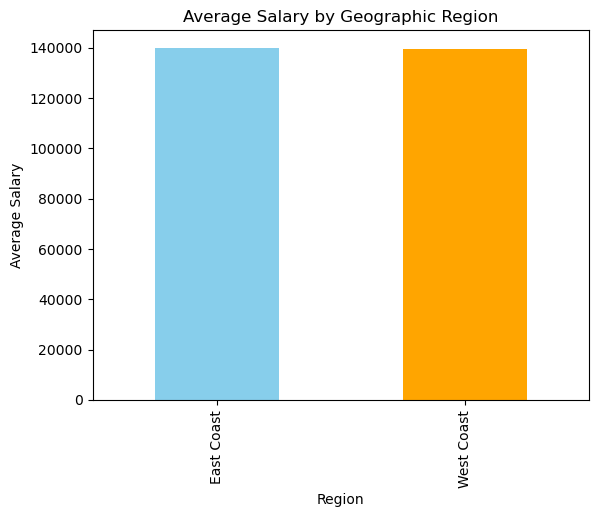

In [239]:
import numpy as np

# Define the longitude ranges for East Coast and West Coast (using a simple division)
df['Region'] = np.where(df['Longitude'] < -100, 'West Coast', 'East Coast')

# Group by region and calculate the average salary for each region
salary_by_region = df.groupby('Region')['salary'].mean()

# Visualize the average salary by geographic region
salary_by_region.plot(kind='bar', title="Average Salary by Geographic Region", color=['skyblue', 'orange'])
plt.xlabel("Region")
plt.ylabel("Average Salary")
plt.show()

The East Coast has a slightly higher average salary than the West Coast, with both regions offering average salaries above $140,000. This suggests that high-paying job opportunities are fairly comparable between the coasts, with a slight edge in average salary for positions on the East Coast.

### Remote Work Proportion by Location

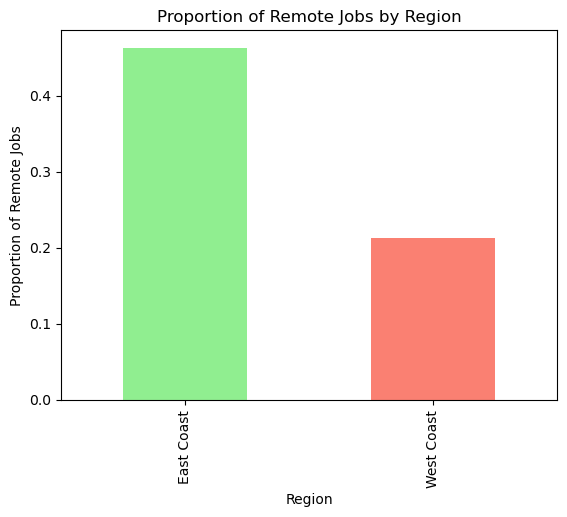

In [240]:
# Ensure the 'Remote Work Option' field is binary, for example as "Remote" or "On-site"
df['Remote'] = df['Remote Work Option'].apply(lambda x: 1 if 'remote' in str(x).lower() else 0)

# Group by region and calculate the proportion of remote work opportunities
remote_proportion_by_location = df.groupby('Region')['Remote'].mean()

# Visualize the proportion of remote jobs by region
remote_proportion_by_location.plot(kind='bar', title="Proportion of Remote Jobs by Region", color=['lightgreen', 'salmon'])
plt.xlabel("Region")
plt.ylabel("Proportion of Remote Jobs")
plt.show()

The East Coast has a significantly higher proportion of remote jobs, with nearly 50% of positions allowing remote work, compared to the West Coast, where the proportion is closer to 20%. This indicates that remote work opportunities are more prevalent on the East Coast than the West Coast.

### **Categorical Feature Exploration**
- **Sector/Industry Breakdown**: Analyze the distribution of jobs across different sectors or industries.
- **Certifications Breakdown**: Explore which certifications are most commonly required or preferred.
- **Company Size Distribution**: Look at the distribution of small, medium, and large companies in the dataset.
- **Job Platform Analysis**: Check how job postings differ across various job platforms (e.g., LinkedIn, Indeed).
- **Visa Sponsorship Availability**: Explore how often visa sponsorship is offered across job types or industries.

### Sector/Industry Breakdown

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [244]:
df1 = df.dropna(subset='Industry')

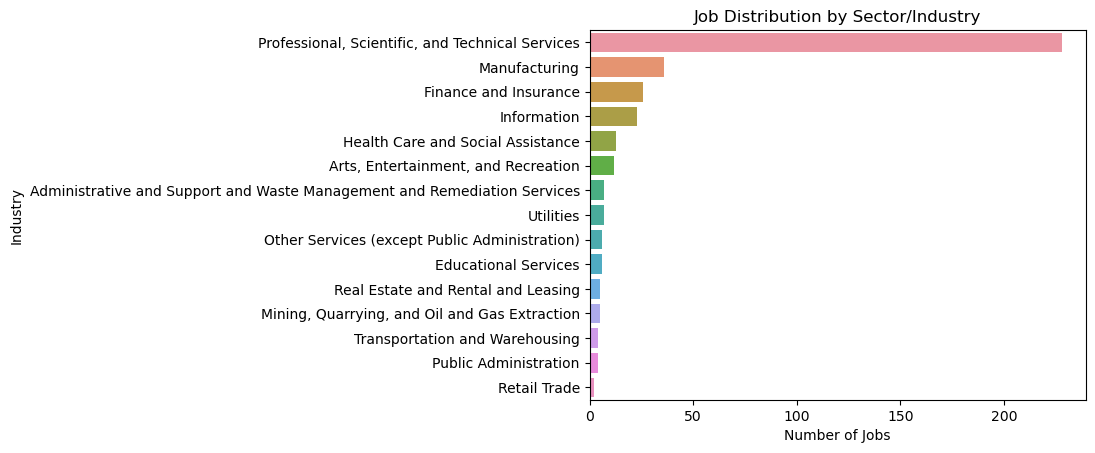

In [247]:
sns.countplot(data=df1, y='Industry', order=df1['Industry'].value_counts().index)
plt.title("Job Distribution by Sector/Industry")
plt.xlabel("Number of Jobs")
plt.ylabel("Industry")
plt.show()

This horizontal bar chart displays the distribution of jobs across various sectors or industries. The Professional, Scientific, and Technical Services sector dominates with the highest number of job postings, significantly more than other industries. Other sectors, such as Manufacturing, Finance and Insurance, Information, and Health Care and Social Assistance, have much lower job counts in comparison. The distribution shows a heavy concentration of jobs in technical and professional services, with other sectors having relatively minimal representation in the dataset.

### Certifications Breakdown

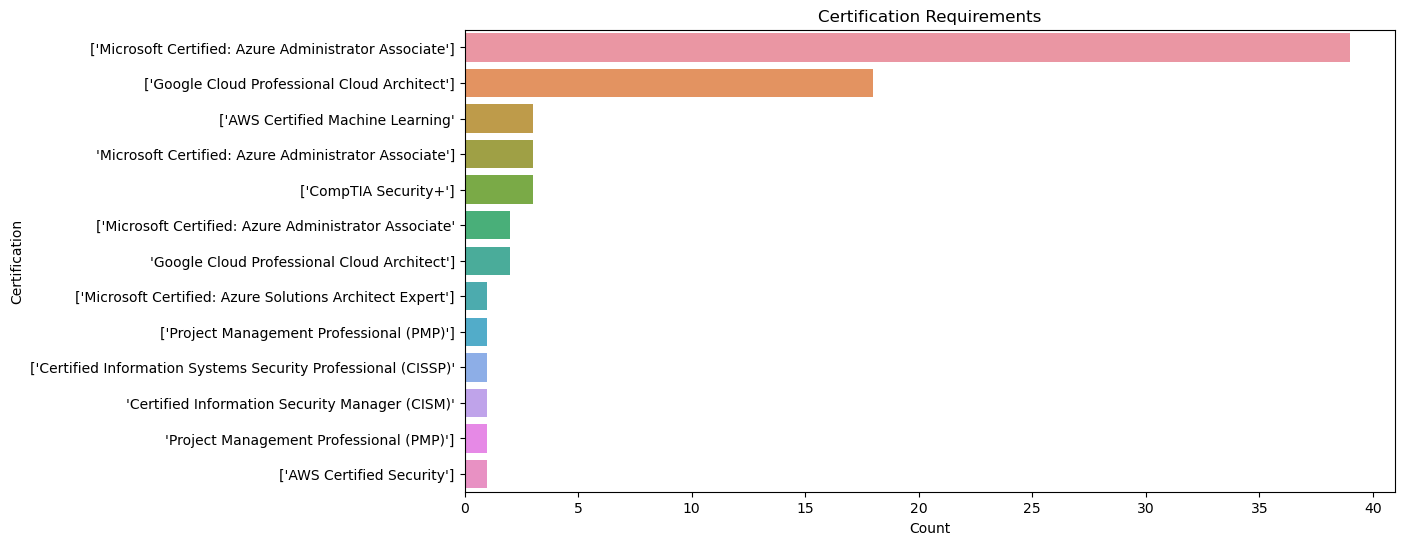

In [248]:
df_exploded = df['Certifications'].dropna().str.split(',').explode().str.strip()
plt.figure(figsize=(12, 6))
sns.countplot(y=df_exploded, order=df_exploded.value_counts().index)
plt.title("Certification Requirements")
plt.xlabel("Count")
plt.ylabel("Certification")
plt.show()

This bar chart displays the frequency of various certification requirements in job postings. The Microsoft Certified: Azure Administrator Associate certification is the most frequently required, with a notable lead over others. Following it are the Google Cloud Professional Cloud Architect and AWS Certified Machine Learning certifications. Other certifications, such as CompTIA Security+, Azure Solutions Architect Expert, and Project Management Professional (PMP), are also listed but with lower counts. This indicates a strong demand for cloud and security certifications in the job market.

### Company Size Distribution

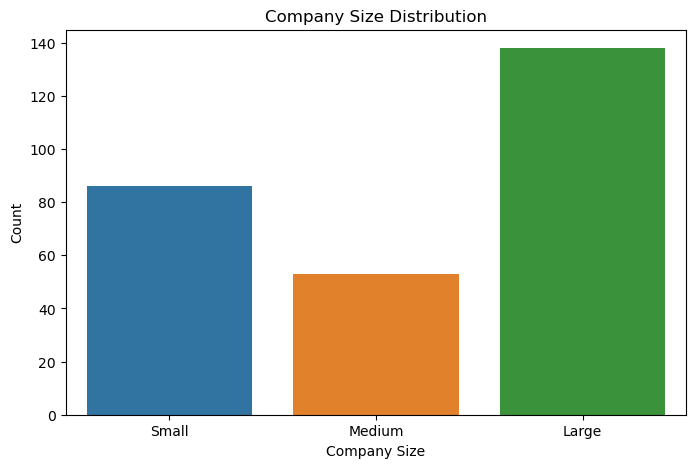

In [249]:
df1 = df.dropna(subset='Company_Size')
plt.figure(figsize=(8, 5))
sns.countplot(data=df1, x='Company_Size', order=['Small', 'Medium', 'Large'])
plt.title("Company Size Distribution")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()

This bar chart shows the distribution of job postings by company size. Large companies have the highest number of job postings, followed by small companies and then medium companies with the least postings. This suggests that larger companies are more active in hiring compared to smaller and medium-sized companies.

### Job Platform Analysis

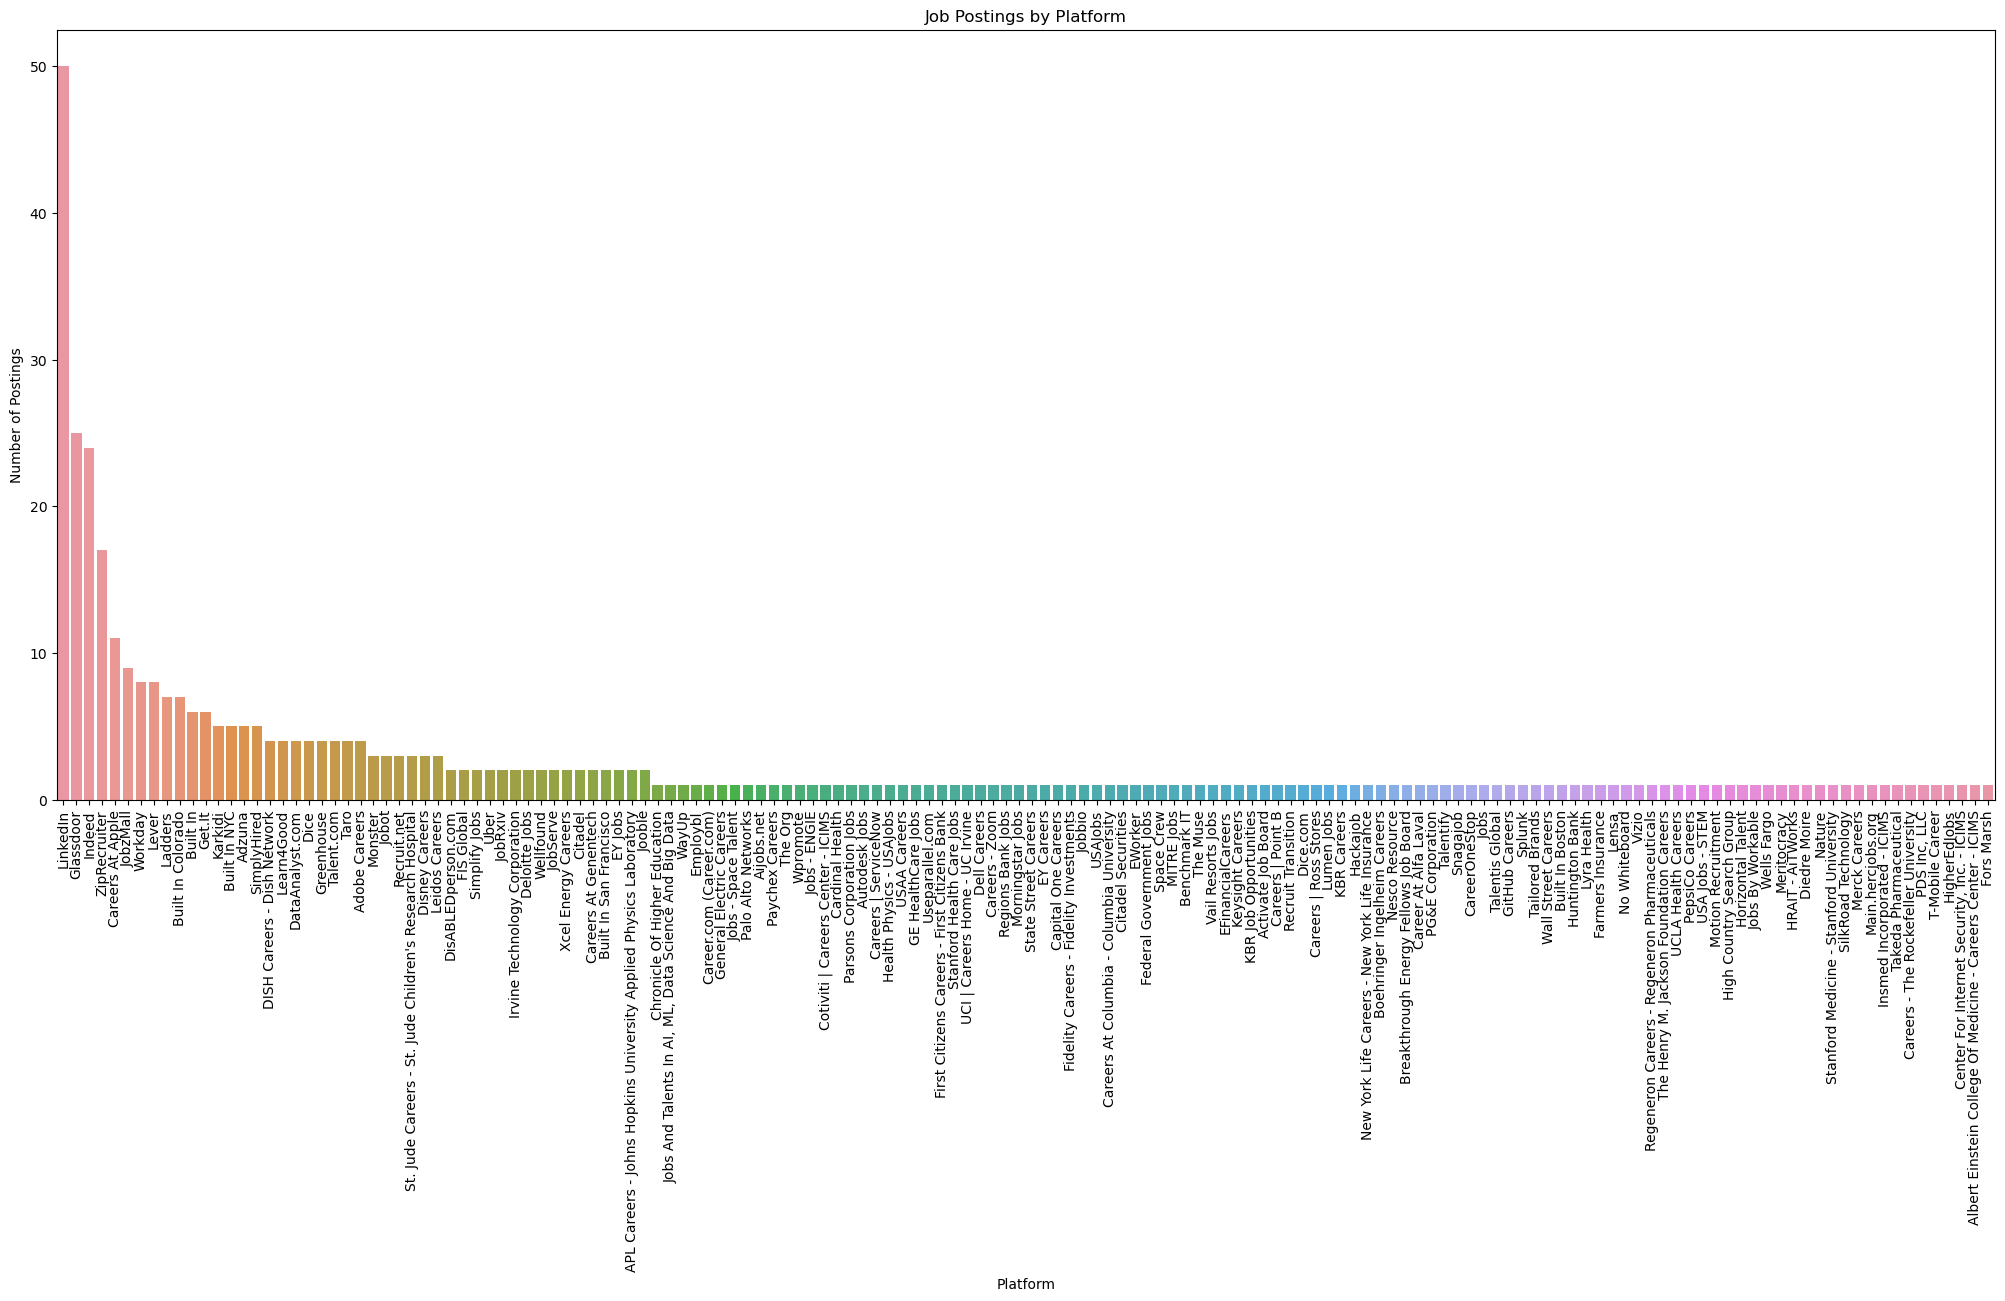

In [255]:
plt.figure(figsize=(25, 10))
sns.countplot(data=df, x='via', order=df['via'].value_counts().index)
plt.title("Job Postings by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Postings")
plt.xticks(rotation=90)
plt.show()

This bar chart illustrates the distribution of job postings across various platforms. LinkedIn stands out with the highest number of postings, followed by platforms like Indeed and Glassdoor, which also show a significant number of postings. Other platforms have fewer postings, with a long tail of niche or specialized job boards contributing a smaller number of opportunities. This suggests that major job platforms remain the primary sources for job listings, while other sites contribute to a more targeted or industry-specific audience.

### Visa Sponsorship Availability

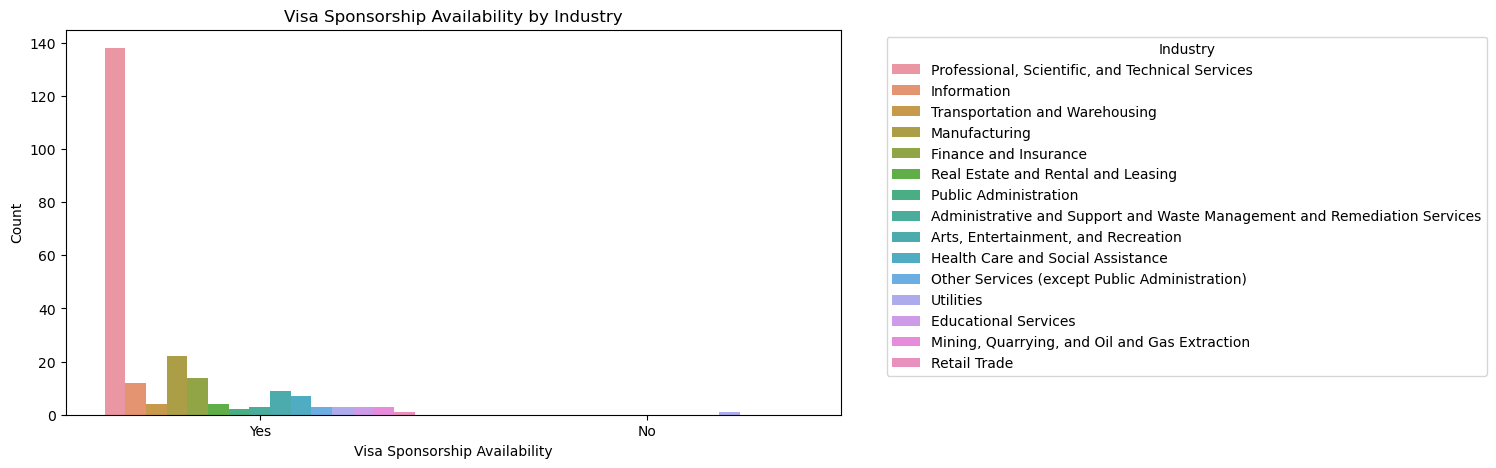

In [256]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Visa_Sponsorship', hue='Industry')
plt.title("Visa Sponsorship Availability by Industry")
plt.xlabel("Visa Sponsorship Availability")
plt.ylabel("Count")
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This bar chart displays visa sponsorship availability across different industries. The "Professional, Scientific, and Technical Services" industry shows a high number of positions offering visa sponsorship, with other industries such as "Information," "Finance and Insurance," and "Manufacturing" also offering sponsorship, albeit in smaller numbers. Very few positions across various sectors explicitly lack visa sponsorship, indicating that the majority of industries in this dataset are open to sponsoring visas, especially in technical and scientific fields.

### **Correlations and Associations**
- **Correlation Matrix**: Compute correlations between numerical features (e.g., salary, years of experience) to find relationships.
- **Crosstab Analysis**: Perform crosstab analysis for categorical features (e.g., job type and location).
- **Feature Importance**: Use machine learning models (e.g., Random Forest) to evaluate feature importance for predicting salary or job title.

In [257]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Correlation Matrix

In [259]:
df1 = df.dropna(subset='required_years_experience')
df1 = df1.dropna(subset='Description_word_length')

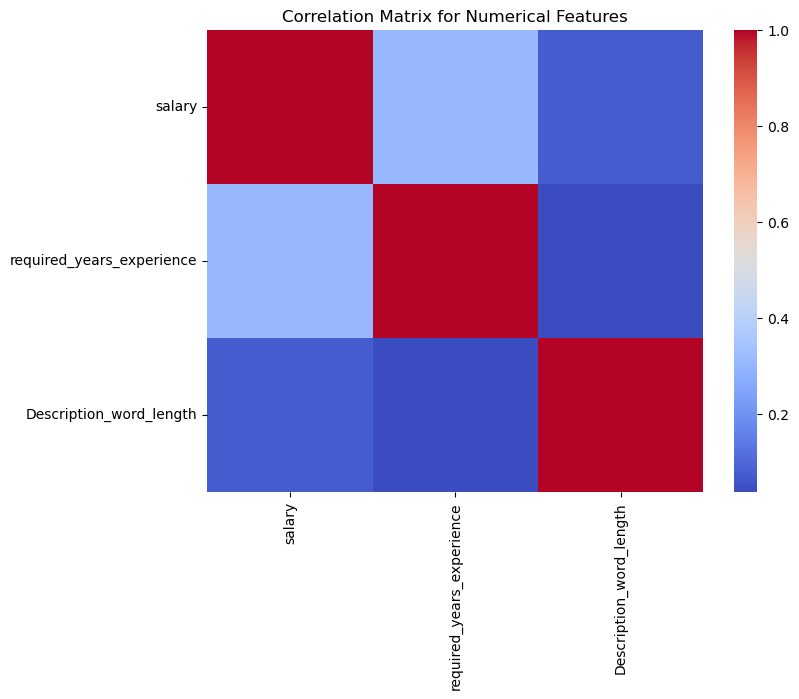

In [271]:
# Selecting numerical features for correlation matrix
numerical_features = df1[['salary', 'required_years_experience', 'Description_word_length']]

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

This visualizes the correlation matrix for selected numerical features in the dataset: "salary," "required years of experience," and "description word length." Darker red or blue hues indicate stronger positive or negative correlations, respectively. The matrix suggests relationships among these variables, with moderate correlations visible between "salary" and "required years of experience" and possibly between "salary" and "description word length." The visual aid helps to understand the associations between key numerical attributes in job data, providing insight into how certain features may influence or relate to each other.

### Crosstab Analysis

In [272]:
df1 = df.dropna(subset='job_type')
df1 = df1.dropna(subset='Location')

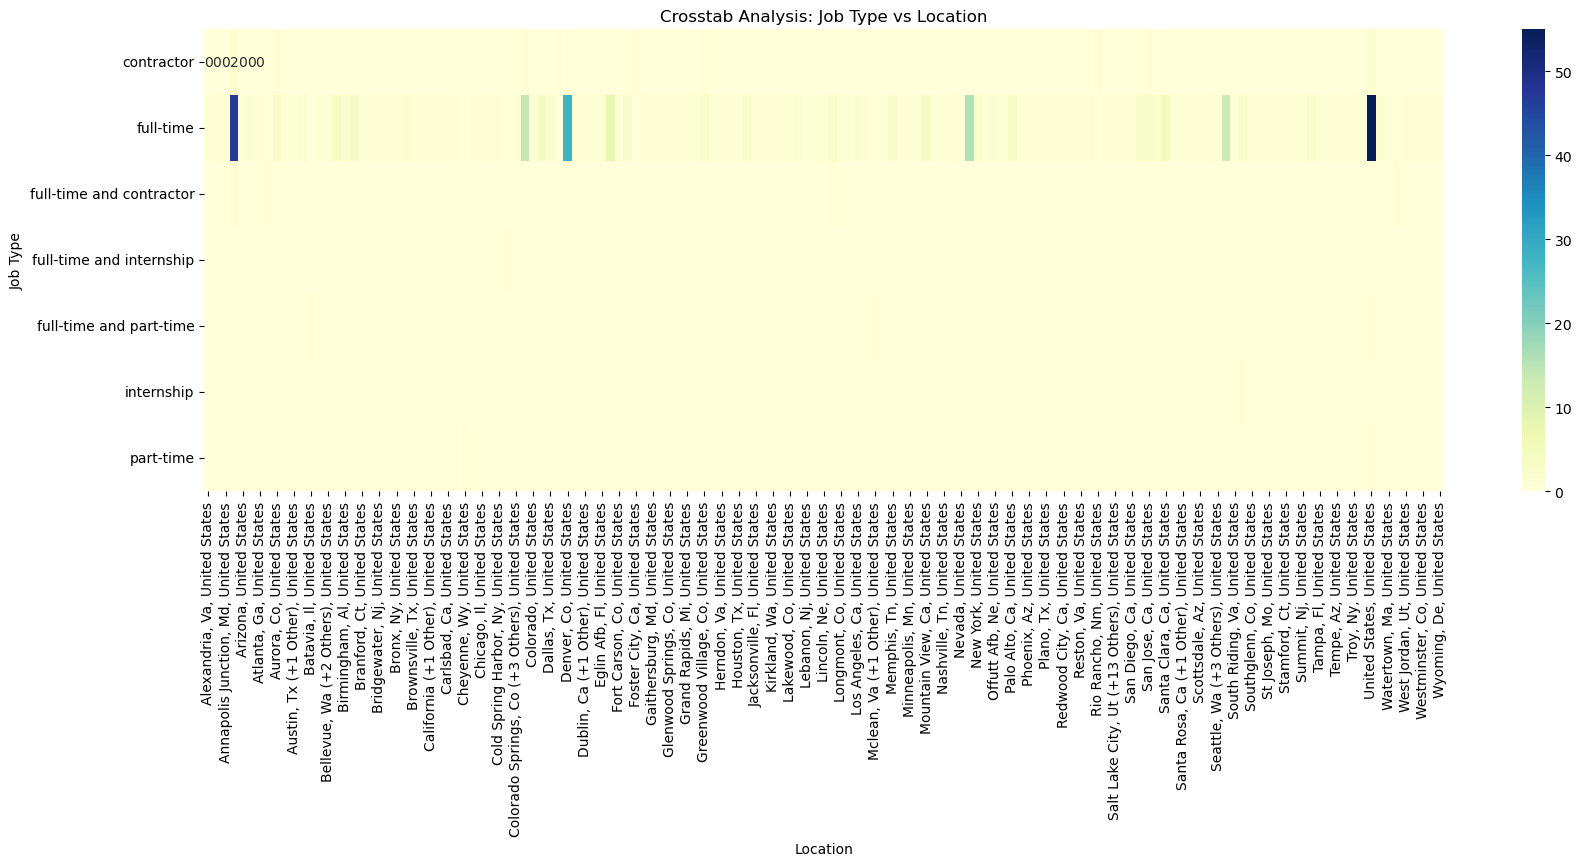

In [273]:
# Crosstab analysis between job type and location
job_location_crosstab = pd.crosstab(df1['job_type'], df1['Location'])

# Display crosstab results
plt.figure(figsize=(20, 6))
sns.heatmap(job_location_crosstab, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Crosstab Analysis: Job Type vs Location")
plt.xlabel("Location")
plt.ylabel("Job Type")
plt.show()

This provides a crosstab analysis of job types across different locations in the United States. The color intensity represents the frequency of each job type in specific locations, with darker shades indicating higher counts. Full-time positions are more prominently distributed across various locations compared to other job types, as indicated by the darker cells in rows associated with full-time jobs. This visualization helps to identify trends in job type availability across geographic regions, making it easier to see which locations have higher concentrations of certain types of employment.

### Feature Importance

In [274]:
df1 = df.dropna(subset='required_years_experience')
df1 = df1.dropna(subset='Description_word_length')
df1 = df1.dropna(subset='experience_level')

D:\temp\ipykernel_20068\693534459.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



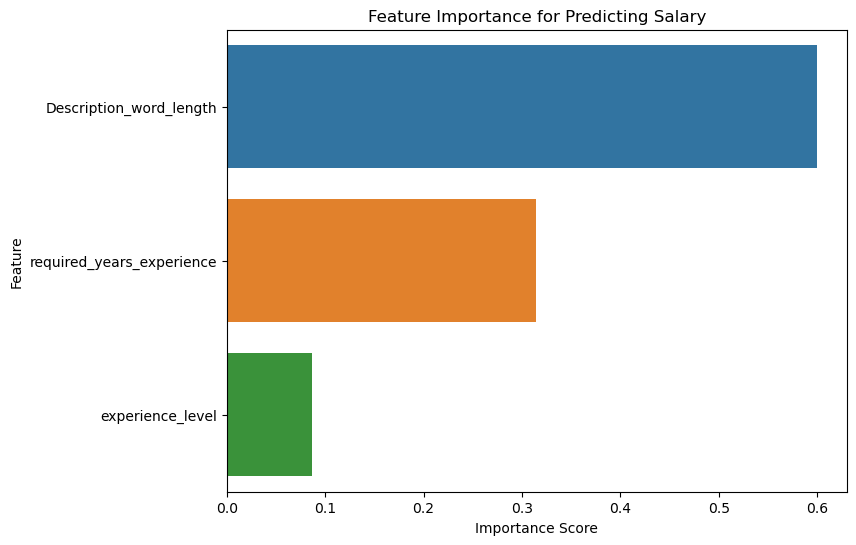

Mean Squared Error: 4107568456.57


In [275]:
# Prepare data for Random Forest model
# Select features and target variable
X = df1[['required_years_experience', 'Description_word_length', 'experience_level']]
y = df1['salary']

# Convert categorical feature to numerical using LabelEncoder
X['experience_level'] = LabelEncoder().fit_transform(X['experience_level'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance analysis
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance for Predicting Salary")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Evaluate model performance (optional)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

This bar chart displays the importance scores of different features in predicting salary. "Description_word_length" has the highest importance score, suggesting that the length of the job description is the most influential factor in determining salary. The "required_years_experience" feature also plays a significant role, while "experience_level" contributes less to the salary prediction compared to the other features. This analysis helps prioritize features that impact salary, guiding model refinement and feature selection for predictive tasks.

### **Clustering and Segmentation**
- **Job Title Clustering**: Cluster similar job titles using text similarity or clustering algorithms (e.g., k-means).
- **Salary Segmentation**: Group job listings into salary tiers (low, medium, high) for further analysis.
- **Geographic Segmentation**: Segment job listings based on location proximity or geographic region.

### Job Title Clustering

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly 

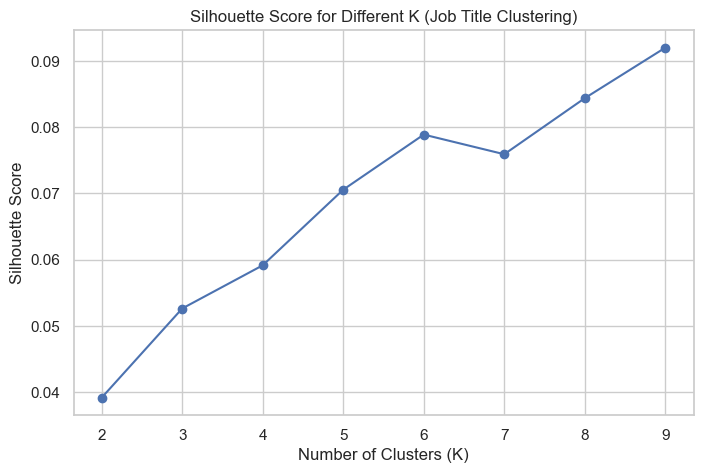

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



                                            title  title_cluster
0                   Ai Solution Architect - Azure              5
1                           Ai Solution Architect              5
2     Solution Architect Data & Ai - Ctj - Secret              5
3                          Ai Solutions Architect              5
4  Solutions Architect, Data And Ai, Google Cloud              5


In [276]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Ensure seaborn is using the right style for plots
sns.set(style="whitegrid")

# Assuming `df` is the DataFrame with job listing data
# Also assuming 'title', 'salary', 'Latitude', and 'Longitude' columns are present in `df`

# 1. **Job Title Clustering**
# Convert job titles to vectorized form
vectorizer = TfidfVectorizer(stop_words='english')
title_vectors = vectorizer.fit_transform(df['title'].fillna(''))

# Determine optimal clusters for job titles with silhouette score
silhouette_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(title_vectors)
    silhouette_avg = silhouette_score(title_vectors, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to find optimal k
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different K (Job Title Clustering)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

# Choose optimal k (can be based on silhouette score or a set number)
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # offset by 2 for the range
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['title_cluster'] = kmeans.fit_predict(title_vectors)

# Show the clustering results
print(df[['title', 'title_cluster']].head())

The line chart shows the Silhouette Scores for different values of K (number of clusters) in a job title clustering analysis. The Silhouette Score increases as K grows, with the highest score at K=9, indicating that clustering with 9 groups yields the best-defined clusters in this range. This helps in choosing the optimal number of clusters by maximizing the separation between clusters and cohesion within clusters.

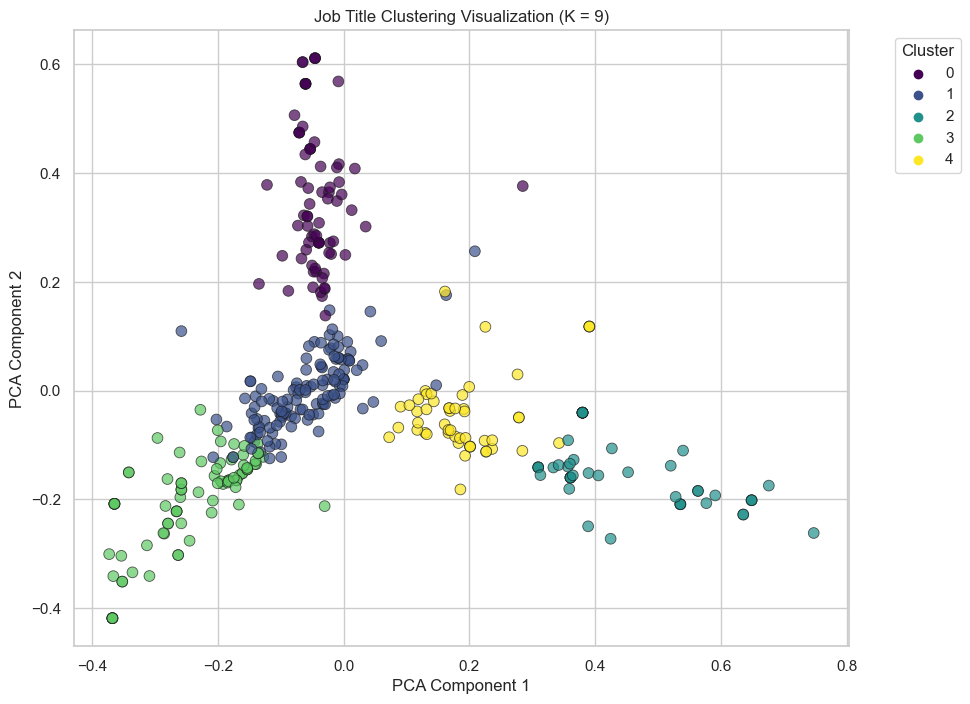

In [280]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce dimensionality of title vectors to 2D using PCA
pca = PCA(n_components=2, random_state=42)
title_vectors_2d = pca.fit_transform(title_vectors.toarray())

# Alternatively, you could use TSNE for non-linear dimensionality reduction
# tsne = TSNE(n_components=2, random_state=42)
# title_vectors_2d = tsne.fit_transform(title_vectors.toarray())

# Add the 2D coordinates to the DataFrame
df['title_2d_x'] = title_vectors_2d[:, 0]
df['title_2d_y'] = title_vectors_2d[:, 1]

# Plot the clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='title_2d_x', y='title_2d_y', hue='title_cluster', palette='viridis', s=60, alpha=0.7, edgecolor='k')
plt.title(f"Job Title Clustering Visualization (K = {optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This scatter plot visualizes the clustering of job titles with K=9 clusters, projected onto two principal components (PCA Component 1 and PCA Component 2). Each color represents a distinct cluster, helping to reveal the structure and separation of job titles in the reduced two-dimensional space. This visualization aids in understanding how different job titles are grouped and how well-separated the clusters are, based on their similarities.

### Salary Segmentation

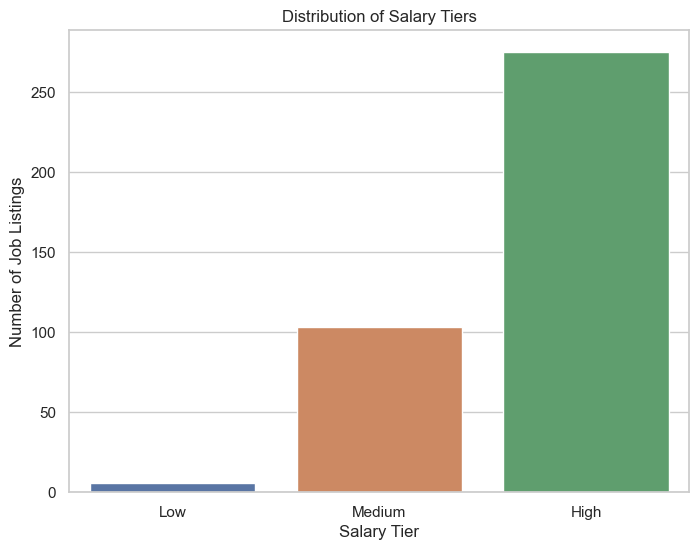

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom salary tiers based on specified cutoff values
def categorize_salary(salary):
    if salary < 60000:
        return 'Low'
    elif 60000 <= salary <= 100000:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column for salary tier
df['salary_tier'] = df['salary'].apply(categorize_salary)

# Display the distribution of salary tiers
plt.figure(figsize=(8, 6))
sns.countplot(x='salary_tier', data=df, order=['Low', 'Medium', 'High'])
plt.title("Distribution of Salary Tiers")
plt.xlabel("Salary Tier")
plt.ylabel("Number of Job Listings")
plt.show()

The bar chart illustrates the distribution of job listings across different salary tiers. It shows a significant concentration of high-tier salary jobs, followed by a moderate number of medium-tier positions, and a very small number of low-tier positions. This distribution suggests that a majority of the job listings offer higher salaries, with fewer opportunities in the lower salary range.

### Geographic Segmentation

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

T

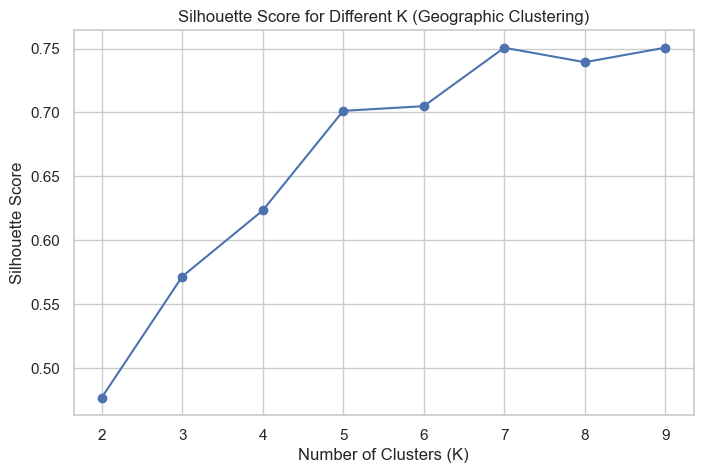

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



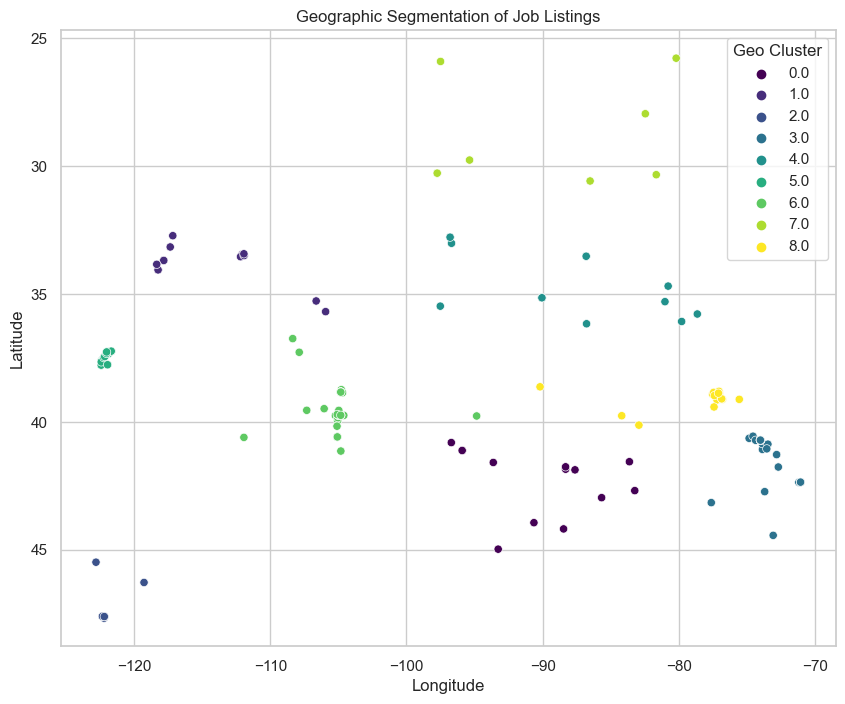

In [279]:
# 3. **Geographic Segmentation**
# Standardize latitude and longitude for clustering
geo_features = df[['Latitude', 'Longitude']].dropna()
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo_features)

# Determine optimal clusters for geographic segmentation using silhouette score
silhouette_scores_geo = []
for k in k_range:
    kmeans_geo = KMeans(n_clusters=k, random_state=42)
    labels_geo = kmeans_geo.fit_predict(geo_scaled)
    silhouette_avg_geo = silhouette_score(geo_scaled, labels_geo)
    silhouette_scores_geo.append(silhouette_avg_geo)

# Plot silhouette scores for geographic clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores_geo, marker='o')
plt.title("Silhouette Score for Different K (Geographic Clustering)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

# Choose optimal k for geographic segmentation
optimal_k_geo = silhouette_scores_geo.index(max(silhouette_scores_geo)) + 2
kmeans_geo = KMeans(n_clusters=optimal_k_geo, random_state=42)
df.loc[geo_features.index, 'geo_cluster'] = kmeans_geo.fit_predict(geo_scaled)

# Display a map of clusters (basic visualization)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='geo_cluster', palette='viridis', legend='full')
plt.title("Geographic Segmentation of Job Listings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Geo Cluster")
plt.show()

The two images provide insights into geographic clustering of job listings. The first image shows the Silhouette Score for different values of KK in clustering, helping identify the optimal number of clusters. The score improves as KK increases, peaking around K=7K=7, suggesting that seven clusters might best capture geographic grouping patterns.

The second image visualizes the actual clusters on a map, where each point represents a job listing's location with color-coded clusters based on latitude and longitude. This clustering helps identify spatial patterns in job distribution across the United States, with distinct geographic regions highlighted.

### **Dimensionality Reduction**
- **PCA**: Perform PCA to reduce the dimensionality of the data and visualize in 2D. 
- **t-SNE**: Perform t-SNE to reduce the dimensionality of the data and visualize in 2D. 

### PCA

In [ ]:
df1 = df.dropna(subset='required_years_experience')
df1 = df1.dropna(subset='Team_Size')
df1 = df1.dropna(subset='Description_word_length')

In [294]:
df_numeric = df1.select_dtypes(include=['number'])

print(df_numeric.columns)

Index(['salary', 'required_years_experience', 'Description_word_length',
       'Team_Size'],
      dtype='object')


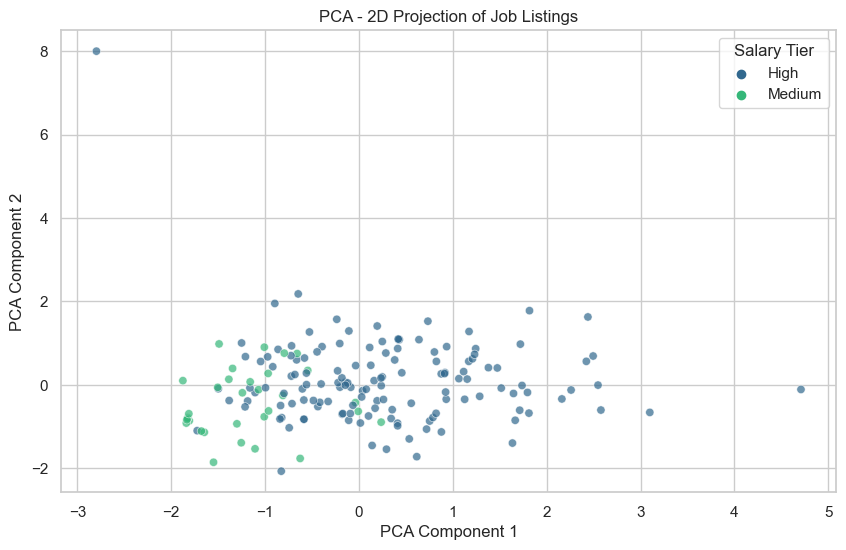

In [295]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming df is the DataFrame with your data, and it has been cleaned
# Select numerical features for dimensionality reduction

# Create a pipeline with an imputer and PCA
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace NaNs with column means
    ('pca', PCA(n_components=2))
])


numerical_features = df1.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# 1. **PCA**: Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df1['PCA1'] = pca_result[:, 0]
df1['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df1, hue='salary_tier', palette='viridis', alpha=0.7)
plt.title("PCA - 2D Projection of Job Listings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Salary Tier')
plt.show()

The PCA plot shows a 2D projection of job listings based on principal component analysis, with points representing different job listings categorized by salary tier (High and Medium). The scatter distribution along the two principal components provides a visual grouping of the listings, revealing potential clusters or patterns in the data. High salary listings (in darker blue) are widely spread, while medium salary listings (in green) appear more clustered in certain regions, suggesting possible distinctions in job characteristics or requirements between these salary tiers.

### t-SNE

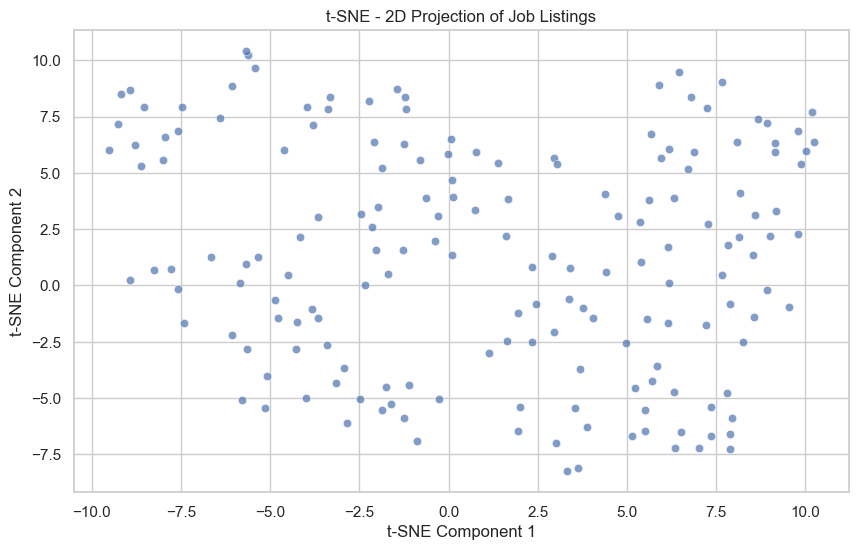

In [300]:
# 2. **t-SNE**: Perform t-SNE to reduce the data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(scaled_data)
df_numeric['t-SNE1'] = tsne_result[:, 0]
df_numeric['t-SNE2'] = tsne_result[:, 1]

# Plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=df_numeric, alpha=0.7)
plt.title("t-SNE - 2D Projection of Job Listings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

This t-SNE plot provides a 2D projection of job listings based on t-distributed stochastic neighbor embedding (t-SNE), which is particularly useful for visualizing high-dimensional data in a lower dimension. Each point represents a job listing, and the layout captures local similarities, meaning that listings with similar characteristics are closer together. While there isn’t a distinct clustering pattern, the spread suggests varying degrees of similarity among listings. t-SNE emphasizes local structure, so closer points may share more common attributes compared to those further apart.

### **Patterns and Trends**
- **Trends in Job Types**: Analyze how the proportions of full-time, part-time, and contract jobs have changed over time.
- **Emerging Technologies**: Track trends in the demand for specific technologies or skills over time.
- **Sector Growth**: Identify growing or shrinking industries based on the number of job postings over time.
- **Benefits and Perks Trends**: Analyze which benefits (e.g., remote work, stock options) are becoming more or less common.

### Trends in Job Types

In [301]:
from collections import Counter

<Figure size 1200x600 with 0 Axes>

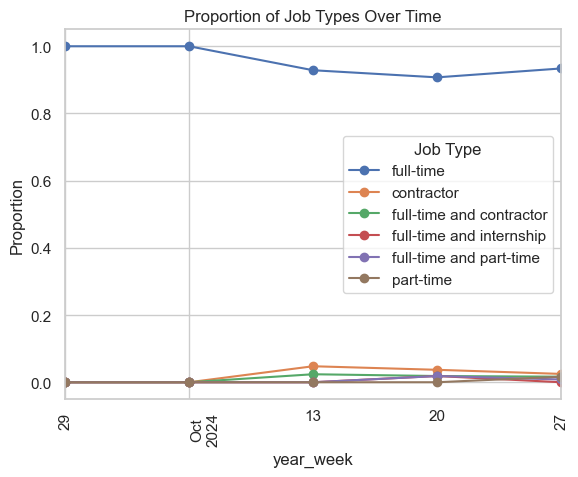

In [307]:
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')
df['year_week'] = df['posted_date'].dt.to_period('W')

sns.set(style="whitegrid")

# 1. **Trends in Job Types** 
job_type_counts = df.groupby(['year_week', 'job_type']).size().unstack().fillna(0)
job_type_proportion = job_type_counts.div(job_type_counts.sum(axis=1), axis=0)

# Plotting job type trends over time
plt.figure(figsize=(12, 6))
job_type_proportion.plot(kind="line", marker='o')
plt.title("Proportion of Job Types Over Time")
plt.xlabel("year_week")
plt.ylabel("Proportion")
plt.legend(title="Job Type")
plt.xticks(rotation=90)
plt.show()

This line plot displays the proportion of different job types over time, organized by weekly intervals. The "full-time" category (blue line) dominates the job postings throughout the observed weeks, though there is a slight decline in its proportion over time. Other job types, including "contractor," "full-time and contractor," "full-time and internship," "full-time and part-time," and "part-time," remain minimal and fairly consistent, with only minor fluctuations. This visualization highlights the predominance of full-time roles in the dataset, while other job types have relatively low and stable proportions.

### Emerging Technologies

In [324]:
df['skills_required'] = df['skills_required'].fillna('').str.lower()
df['skills_required'] = df['skills_required'].apply(lambda x: [skill.strip() for skill in x.split(',')])

In [335]:
# Explode skills_required so each skill has its own row
exploded_skills = df.explode('skills_required')

D:\temp\ipykernel_20068\606359357.py:22: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



<Figure size 1200x600 with 0 Axes>

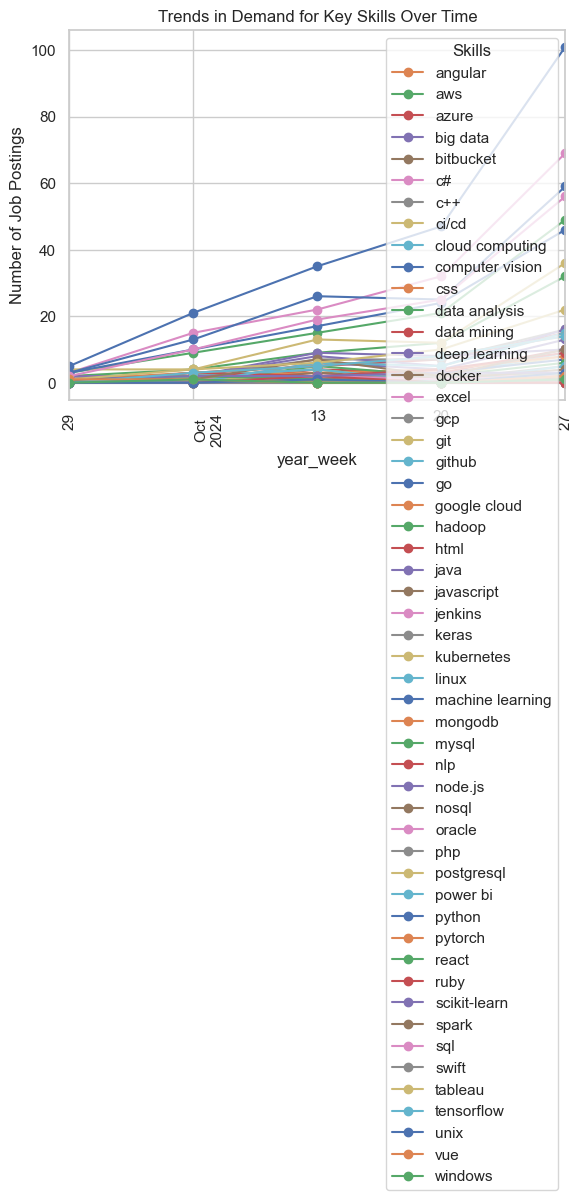

In [337]:
# Convert 'posted_date' to datetime format
exploded_skills['posted_date'] = pd.to_datetime(exploded_skills['posted_date'], errors='coerce')

# Drop rows where 'posted_date' could not be converted (if necessary)
exploded_skills = exploded_skills.dropna(subset=['posted_date'])


# Now extract the period with the corrected date format
exploded_skills['year_week'] = exploded_skills['posted_date'].dt.to_period('W')

# Group by year_month and skills_required to get monthly counts for each skill
monthly_skill_counts = exploded_skills.groupby(['year_week', 'skills_required']).size().unstack(fill_value=0)

# Plot the trends for each skill over time
plt.figure(figsize=(12, 6))
monthly_skill_counts.plot(marker='o')
plt.title("Trends in Demand for Key Skills Over Time")
plt.xlabel("year_week")
plt.ylabel("Number of Job Postings")
plt.legend(title="Skills")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This line chart illustrates trends in demand for various key skills over time, measured by the number of job postings each week. Notably, certain skills such as "SQL," "Python," "Java," "AWS," and "Azure" show consistent growth, indicating strong demand in the job market. Meanwhile, other skills remain relatively flat, showing less fluctuation in their demand. The chart’s overlapping lines and legend provide a comprehensive view of multiple technical skills and their evolving importance in the job market. This visualization helps identify which skills are most sought after and highlights any emerging trends over the observed period.

### Sector Growth

<Figure size 1200x600 with 0 Axes>

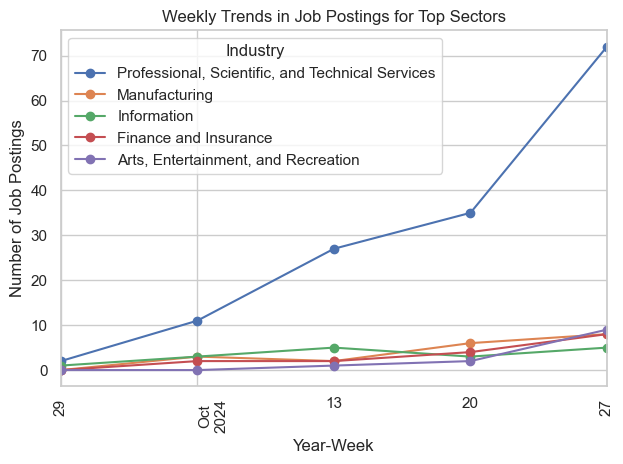

In [339]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'posted_date' is in datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

# Drop rows with NaT in 'posted_date'
df = df.dropna(subset=['posted_date'])

# **Sector Growth Analysis**
# Extract the weekly period from 'posted_date'
df['year_week'] = df['posted_date'].dt.to_period('W')

# Count the number of job postings per sector per week
weekly_sector_counts = df.groupby(['year_week', 'Industry']).size().unstack(fill_value=0)

# Select top 5 sectors by overall frequency for easier visualization
top_sectors = weekly_sector_counts.sum().sort_values(ascending=False).head(5).index
weekly_top_sectors = weekly_sector_counts[top_sectors]

# Plot the trends for the top sectors over time
plt.figure(figsize=(12, 6))
weekly_top_sectors.plot(marker='o')
plt.title("Weekly Trends in Job Postings for Top Sectors")
plt.xlabel("Year-Week")
plt.ylabel("Number of Job Postings")
plt.legend(title="Industry")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This line chart shows the weekly trends in job postings for the top sectors, including "Professional, Scientific, and Technical Services," "Manufacturing," "Information," "Finance and Insurance," and "Arts, Entertainment, and Recreation." The "Professional, Scientific, and Technical Services" sector exhibits a significant increase in postings over time, with a sharp rise around the end of the observed period, indicating a growing demand in this field. In contrast, other sectors show relatively stable or gradual trends, suggesting steady but less pronounced growth in job opportunities compared to the technical services sector. This visualization highlights industry-specific job market dynamics and helps identify sectors with increasing demand.


### Benefits and Perks Trends

<Figure size 1200x600 with 0 Axes>

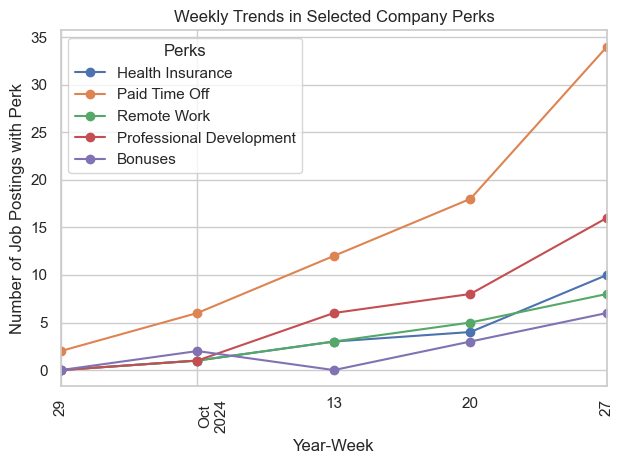

In [344]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'posted_date' is in datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'], errors='coerce')

# Drop rows with NaT in 'posted_date'
df = df.dropna(subset=['posted_date'])

# Define selected perks and their variants
selected_perks = {
    'Health Insurance': ['health insurance', 'medical insurance', 'healthcare benefits'],
    'Paid Time Off': ['paid time off', 'PTO', 'vacation days', 'paid leave'],
    'Remote Work': ['remote work', 'work from home', 'telecommuting', 'virtual work'],
    'Professional Development': ['professional development', 'training programs', 'education assistance'],
    'Bonuses': ['bonuses', 'performance bonuses', 'annual bonuses']
}

# Create columns for each selected perk and mark whether each job posting includes it
for perk, keywords in selected_perks.items():
    regex_pattern = '|'.join(keywords)
    df[perk] = df['Company_Perks'].fillna('').str.contains(regex_pattern, case=False, regex=True).astype(int)

# Extract the weekly period from 'posted_date'
df['year_week'] = df['posted_date'].dt.to_period('W')

# Convert dict_keys to list for indexing
perks_columns = list(selected_perks.keys())

# Count the number of postings with each perk per week
weekly_perks_counts = df.groupby('year_week')[perks_columns].sum()

# Plot the trends for the selected perks over time
plt.figure(figsize=(12, 6))
weekly_perks_counts.plot(marker='o')
plt.title("Weekly Trends in Selected Company Perks")
plt.xlabel("Year-Week")
plt.ylabel("Number of Job Postings with Perk")
plt.legend(title="Perks")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This line chart illustrates weekly trends in job postings that offer specific company perks, including "Health Insurance," "Paid Time Off," "Remote Work," "Professional Development," and "Bonuses." "Paid Time Off" shows a significant upward trend, becoming the most common perk by the end of the period, indicating a strong emphasis on work-life balance benefits in job postings. "Professional Development" and "Health Insurance" also display steady growth, reflecting a commitment to employee well-being and career growth opportunities. "Remote Work" and "Bonuses," while also increasing, show a more moderate rise. This chart highlights how certain perks are becoming more prevalent in job postings over time.